# DATA SCIENCE PROJECT

## Data Analysis on Renting Options in Sydney: Airbnb

Airbnb is an online platform for organizing or offering services for accommodation focusing mainly on homestays and holiday experiences. The company is based in San Francisco, California, United States. Users can list their homes/properties on Airbnb as hosts and people can make online bookings by getting in contact with their respective hosts.

We are going to do analysis using various variables such as price ratings house rules etc. which are primarily focused by consumers to use Airbnb and provide a report in an interactive visualization format focusing on all kinds of audiences including naive users as well. Moreover we will come up with a prediction model to predict the patterns or trends between the Airbnb data and Australian Census data.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import rcParams
from wordcloud import WordCloud, STOPWORDS
from nltk.corpus import stopwords
import collections
import cufflinks as cf
import plotly.offline
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)
import warnings; warnings.simplefilter('ignore')
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Interpretation

----

Above mentioned libraries are imported for the project. As the progress is made we will be importing other libraries as per the requirement.

__pd.set_option is used to format the exponential values in the variables.__

# Reading the __`Airbnb dataset`__ 🏘️.

In [2]:
airbnb_complete_data= pd.read_csv("Dataset/listings.csv", index_col="id")
print("The complete dataset of airbnb has shape :" ,airbnb_complete_data.shape)
airbnb_complete_data.head()

The complete dataset of airbnb has shape : (38080, 105)


listing_url       scrape_id last_scraped  \
id                                                                       
11156  https://www.airbnb.com/rooms/11156  20190710033517   2019-07-11   
12351  https://www.airbnb.com/rooms/12351  20190710033517   2019-07-11   
14250  https://www.airbnb.com/rooms/14250  20190710033517   2019-07-10   
15253  https://www.airbnb.com/rooms/15253  20190710033517   2019-07-10   
20865  https://www.airbnb.com/rooms/20865  20190710033517   2019-07-11   

                                                    name  \
id                                                         
11156                               An Oasis in the City   
12351                  Sydney City & Harbour at the door   
14250                                Manly Harbour House   
15253  Stunning Penthouse Apartment In Heart Of The City   
20865                 3 BED HOUSE + 1 BED STUDIO Balmain   

                                                 summary  \
id                                                         
11156  Very central to the city which can be reached ...   
12351  Come stay with Vinh & Stuart (Awarded as one o...   
14250  Beautifully renovated, spacious and quiet, our...   
15253  Penthouse living in a great central location: ...   
20865  Hi! We are a married professional couple with ...   

                                                   space  \
id                                                         
11156  Potts Pt. is a vibrant  and popular inner-city...   
12351  We're pretty relaxed hosts, and we fully appre...   
14250  Our home is a thirty minute walk along the sea...   
15253  A charming two-level, two-bedroom, two-bathroo...   
20865  HOUSE : _________ * DUCTED AIR CONDITIONING IN...   

                                             description experiences_offered  \
id                                                                             
11156  Very central to the city which can be reached ...                none   
12351  Come stay with Vinh & Stuart (Awarded as one o...                none   
14250  Beautifully renovated, spacious and quiet, our...                none   
15253  Penthouse living in a great central location: ...                none   
20865  Hi! We are a married professional couple with ...                none   

                                   neighborhood_overview  \
id                                                         
11156  It is very close to everything and everywhere,...   
12351  Pyrmont is an inner-city village of Sydney, on...   
14250  Balgowlah Heights is one of the most prestigio...   
15253  The location is really central and there is nu...   
20865  BALMAIN is an older inner city village / subur...   

                                                   notes        ...         \
id                                                              ...          
11156  $150.00 key security deposit, refundable on re...        ...          
12351  We've a few reasons for the 6.00pm arrival tim...        ...          
14250                                                NaN        ...          
15253  The apartment is on the top floor with 4 fligh...        ...          
20865  During your stay guests may use the landline f...        ...          

      instant_bookable is_business_travel_ready          cancellation_policy  \
id                                                                             
11156                f                        f                     moderate   
12351                f                        f  strict_14_with_grace_period   
14250                f                        f  strict_14_with_grace_period   
15253                t                        f  strict_14_with_grace_period   
20865                f                        f  strict_14_with_grace_period   

      require_guest_profile_picture  require_guest_phone_verification  \
id                                                                      
11156       

# Interpretation

----

We are reading the airbnb complete dataset which is in comma separated format, file nameing - __`listings.csv`__ , it has __`38080 rows`__ and __`106 columns`__ with index column as __id__.

In [3]:
print(airbnb_complete_data.dtypes)

listing_url                                      object
scrape_id                                         int64
last_scraped                                     object
name                                             object
summary                                          object
space                                            object
description                                      object
experiences_offered                              object
neighborhood_overview                            object
notes                                            object
transit                                          object
access                                           object
interaction                                      object
house_rules                                      object
thumbnail_url                                   float64
medium_url                                      float64
picture_url                                      object
xl_picture_url                                  

# Interpretation

----

We are checking the data types of each variable of the airbnb dataset.

In [4]:
airbnb_complete_data.describe()

scrape_id  thumbnail_url  medium_url  xl_picture_url  \
count          38080.000          0.000       0.000           0.000   
mean  20190710033526.828            nan         nan             nan   
std                9.828            nan         nan             nan   
min   20190710033517.000            nan         nan             nan   
25%   20190710033517.000            nan         nan             nan   
50%   20190710033517.000            nan         nan             nan   
75%   20190710033517.000            nan         nan             nan   
max   20190710033517.000            nan         nan             nan   

            host_id  host_acceptance_rate  host_listings_count  \
count     38080.000                 0.000            38054.000   
mean   76016308.962                   nan                8.749   
std    74806520.125                   nan               30.590   
min       12894.000                   nan                0.000   
25%    15739069.000                   nan                1.000   
50%    46761195.500                   nan                1.000   
75%   122019195.500                   nan                3.000   
max   274727754.000                   nan              438.000   

       host_total_listings_count  neighbourhood_group_cleansed  latitude  \
count                  38054.000                         0.000 38080.000   
mean                       8.749                           nan   -33.863   
std                       30.590                           nan     0.072   
min                        0.000                           nan   -34.135   
25%                        1.000                           nan   -33.898   
50%                        1.000                           nan   -33.882   
75%                        3.000                           nan   -33.832   
max                      438.000                           nan   -33.390   

             ...          review_scores_checkin  review_scores_communication  \
count        ...                      25997.000                    26028.000   
mean         ...                          9.721                        9.728   
std          ...                          0.816                        0.832   
min          ...                          2.000                        2.000   
25%          ...                         10.000                       10.000   
50%          ...                         10.000                       10.000   
75%          ...                         10.000                       10.000   
max          ...                         10.000                       10.000   

       review_scores_location  review_scores_value  jurisdiction_names  \
count               25997.000            25994.000               0.000   
mean                    9.688                9.337                 nan   
std                     0.746                1.044                 nan   
min                     2.000                2.000                 nan   
25%                    10.000                9.000                 nan   
50%                    10.000               10.000                 nan   
75%                    10.000               10.000                 nan   
max                    10.000               10.000                 nan   

       calculated_host_listings_count  \
count                       38080.000   
mean                            7.112   
std                            23.848   
min                             1.000   
25%                             1.000   
50%                             1.000   
75%                             2.000   
max                           197.000   

       calculated_host_listings_count_entire_homes  \
count                                    38080.000   
mean                                         6.161   
std                                         23.910   
min                                          0.000   
25%                                          0.000   
50%          

# Interpretation

----

We are depicting statistical values for the dataset such as __`count`__ (total number of values) , __`mean`__ (average values of each variable), __`standard deviation`__ (how a value is deviated from the central value), __`percentiles`__ as well.

In [5]:
airbnb_cleaned_data=airbnb_complete_data[["name","description","experiences_offered","transit","host_id","host_name","host_location","host_response_rate","host_is_superhost","host_listings_count","host_verifications","host_identity_verified","street","neighbourhood","neighbourhood_cleansed","city","state","zipcode","market","smart_location","is_location_exact","property_type","room_type","accommodates","bathrooms","bedrooms","beds","bed_type","amenities","price","security_deposit","guests_included","extra_people","minimum_nights","maximum_nights","has_availability","availability_30","availability_60","availability_90","availability_365","number_of_reviews","number_of_reviews_ltm","requires_license","instant_bookable","cancellation_policy","require_guest_phone_verification","calculated_host_listings_count","reviews_per_month", "house_rules"]]
print("After selecting required columns, dataset has shape:",airbnb_cleaned_data.shape)
airbnb_cleaned_data.head()

After selecting required columns, dataset has shape: (38080, 49)


name  \
id                                                         
11156                               An Oasis in the City   
12351                  Sydney City & Harbour at the door   
14250                                Manly Harbour House   
15253  Stunning Penthouse Apartment In Heart Of The City   
20865                 3 BED HOUSE + 1 BED STUDIO Balmain   

                                             description experiences_offered  \
id                                                                             
11156  Very central to the city which can be reached ...                none   
12351  Come stay with Vinh & Stuart (Awarded as one o...                none   
14250  Beautifully renovated, spacious and quiet, our...                none   
15253  Penthouse living in a great central location: ...                none   
20865  Hi! We are a married professional couple with ...                none   

                                                 transit  host_id host_name  \
id                                                                            
11156  It is 7 minutes walk to the Kings Cross.train ...    40855   Colleen   
12351  Our home is centrally located and an easy walk...    17061    Stuart   
14250  Balgowlah - Manly bus # 131 or #132  (Bus stop...    55948     Heidi   
15253  If walking is not your thing I am well service...    59850     Morag   
20865  Balmain is well serviced by buses (from Darlin...    64282     Fiona   

                                 host_location host_response_rate  \
id                                                                  
11156  Potts Point, New South Wales, Australia                50%   
12351       Sydney, New South Wales, Australia                94%   
14250       Sydney, New South Wales, Australia               100%   
15253       Sydney, New South Wales, Australia               100%   
20865       Sydney, New South Wales, Australia               100%   

      host_is_superhost  host_listings_count  \
id                                             
11156                 f                1.000   
12351                 t                2.000   
14250                 f                2.000   
15253                 f                3.000   
20865                 t                2.000   

                             ...                         availability_365  \
id                           ...                                            
11156                        ...                                      354   
12351                        ...                                       19   
14250                        ...                                       99   
15253                        ...                                      336   
20865                        ...                                      142   

      number_of_reviews number_of_reviews_ltm requires_license  \
id                                                               
11156               185                    10                f   
12351               516                    46                f   
14250                 2                     1                f   
15253               323                    49                f   
20865                16                     1                f   

      instant_bookable          cancellation_policy  \
id                                                    
11156                f                     moderate   
12351                f  strict_14_with_grace_period   
14250                f  strict_14_with_grace_period   
15253                t  strict_14_with_grace_period   
20865                f  strict_14_with_grace_period   

      require_guest_phone_verification calculated_host_listings_count  \
id                                                                      
11156                                f                              1   
12351                                t                              2   
14250         

# Interpretation

----

From the above piece of code, we are creating a new dataframe named __`airbnb_cleaned_data`__ which contains variables we required for the analysis.

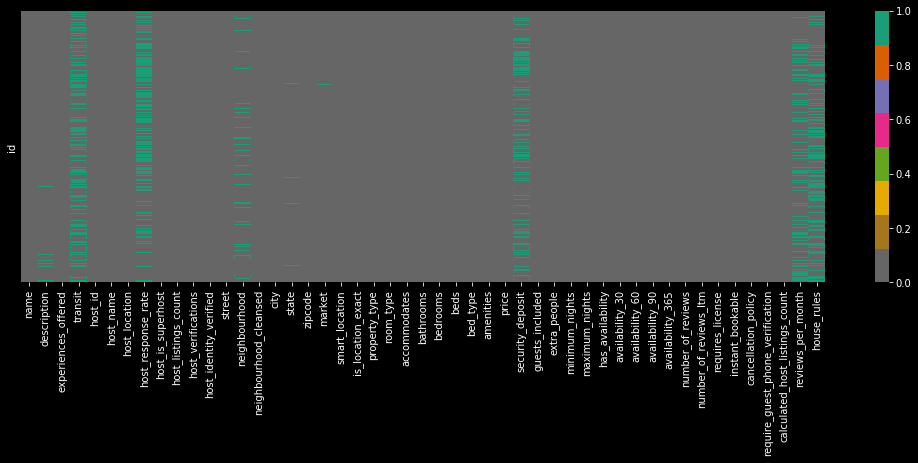

In [6]:
plt.style.use ("dark_background")
plt.subplots(figsize=(18,5))
sns.heatmap(airbnb_cleaned_data.isnull(),yticklabels=False,cbar=True,
            cmap='Dark2_r')

In [7]:
airbnb_cleaned_data=airbnb_cleaned_data[(airbnb_cleaned_data["state"]=="NSW")]
airbnb_cleaned_data.shape

(36757, 49)

# Interpretation

----

We are keeping rows which have value __`NSW`__ for the __`state`__ variable and output has __`36757 rows`__ & __`49 columns__`.

In [8]:
airbnb_cleaned_data['requires_license'] = airbnb_cleaned_data['requires_license'].map({'f': 0})
airbnb_cleaned_data['instant_bookable'] = airbnb_cleaned_data['instant_bookable'].map({'f': 0, 't': 1})
airbnb_cleaned_data['require_guest_phone_verification'] = airbnb_cleaned_data['require_guest_phone_verification'].map({'f': 0,'t': 1})
airbnb_cleaned_data['is_location_exact'] = airbnb_cleaned_data['is_location_exact'].map({'f': 0,'t': 1})
airbnb_cleaned_data['has_availability'] = airbnb_cleaned_data['has_availability'].map({'f': 0,'t': 1})
airbnb_cleaned_data['host_is_superhost'] = airbnb_cleaned_data['host_is_superhost'].replace('t', '1', regex=True)
airbnb_cleaned_data['host_is_superhost'] = airbnb_cleaned_data['host_is_superhost'].replace('f', '0', regex=True)
airbnb_cleaned_data['host_identity_verified'] = airbnb_cleaned_data['host_identity_verified'].replace('t', '1', regex=True)
airbnb_cleaned_data['host_identity_verified'] = airbnb_cleaned_data['host_identity_verified'].replace('f', '0', regex=True)

# Interpretation

----

We are mapping __`0`__ to __`f(false)`__ and __`1`__ to __`t(true)`__ values of variables __`requires_license`__ ,__`instant_bookable`__, __`require_guest_phone_verification`__ , __`is_location_exact`__, __`has_availability`__, __`host_is_superhost`__ and __`host_identity_verified`__ and converting them to __`int`__ data types.

In [9]:
airbnb_cleaned_data['bed_type'] = airbnb_cleaned_data['bed_type'].map({'Airbed' : 0, 'Couch' : 1,'Futon':2,'Pull-out Sofa':3,
                                                                       'Real Bed':4})
airbnb_cleaned_data['room_type'] = airbnb_cleaned_data['room_type'].map({'Entire home/apt' : 0,'Private room':1,'Shared room':2})

airbnb_cleaned_data['cancellation_policy'] = airbnb_cleaned_data['cancellation_policy'].map({'flexible': 0,
                                                                                            'luxury_moderate':1,
                                                                                            'luxury_no_refund':2,
                                                                                            'luxury_super_strict_125':3,
                                                                                            'luxury_super_strict_95':4,
                                                                                            'moderate':5,
                                                                                            'strict_14_with_grace_period':6,
                                                                                            'super_strict_30':7,
                                                                                            'super_strict_60':8})

# Interpretation

---

Mapping different __`bed_type`__ , __`room_type`__ and __`cancellation_policy`__ varibales to numeric values.

| __`Variable`__            |  __`Value`__                        | __`Mapped Integer Value`__ |
|---------------------------|:-----------------------------------:|:--------------------------:|
| __`bed_type`__            | Airbed                              | 0                          |
|                           | Couch                               | 1                          |
|                           | Fullton                             | 2                          |
|                           | Pull-out Sofa                       | 3                          |
|                           | Real Bed                            | 4                          |
| __`room_type`__           | Entire home/ap                      | 0                          |
|                           | Private room                        | 1                          |
|                           | Shared room                         | 2                          |
| __`cancellation_policy`__ | flexible                            | 0                          |
|                           | luxury_moderate                     | 1                          |
|                           | luxury_no_refund                    | 2                          |
|                           | luxury_super_strict_125             | 3                          |
|                           | luxury_super_strict_95              | 4                          |
|                           | moderate                            | 5                          |
|                           | strict_14_with_grace_period         | 6                          |
|                           | super_strict_30                     | 7                          |
|                           | super_strict_60                     | 8                          |

90 percentile value is 399.0
91 percentile value is 401.0
92 percentile value is 450.0
93 percentile value is 500.0
94 percentile value is 514.0
95 percentile value is 599.0
96 percentile value is 695.0
97 percentile value is 800.0
98 percentile value is 979.5199999999895
99 percentile value is 1277.2000000000116
100 percentile value is 36128.0


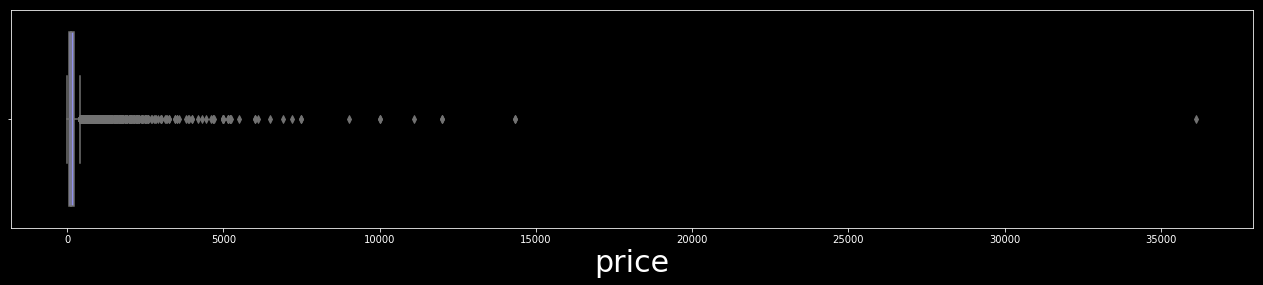

In [10]:
airbnb_cleaned_data['price'] = airbnb_cleaned_data['price'].replace({'\$':'',',':''}, regex = True)
airbnb_cleaned_data['price']= pd.to_numeric(airbnb_cleaned_data['price'])
plt.style.use ("dark_background")
sns.boxplot(airbnb_cleaned_data['price'], palette = 'gist_stern_r')
plt.xlabel("price", size = 30)
plt.subplots_adjust(right=3)
for i in range(90,100 + 1):
    print(f'{i} percentile value is {np.percentile(airbnb_cleaned_data["price"], i)}')
airbnb_cleaned_data=airbnb_cleaned_data[(airbnb_cleaned_data.price>=0) & (airbnb_cleaned_data.price<=1300)]

# Interpretation

----

We have cleanse __`price`__ column of the dataset, removing __$__ symbol and converting the column to __`int`__.

Above boxplot illustrates any __`outliers`__ in the price column. 

From the output ,we can see that __`99 percentile`__ value is around __`1300`__ ; so we have filtered the rows based up on the limit and removed outliers as well.

90 percentile value is 744.0000000000873
91 percentile value is 800.0
92 percentile value is 1000.0
93 percentile value is 1000.0
94 percentile value is 1000.0
95 percentile value is 1000.0
96 percentile value is 1000.0
97 percentile value is 1500.0
98 percentile value is 2000.0
99 percentile value is 2500.0
100 percentile value is 7164.0


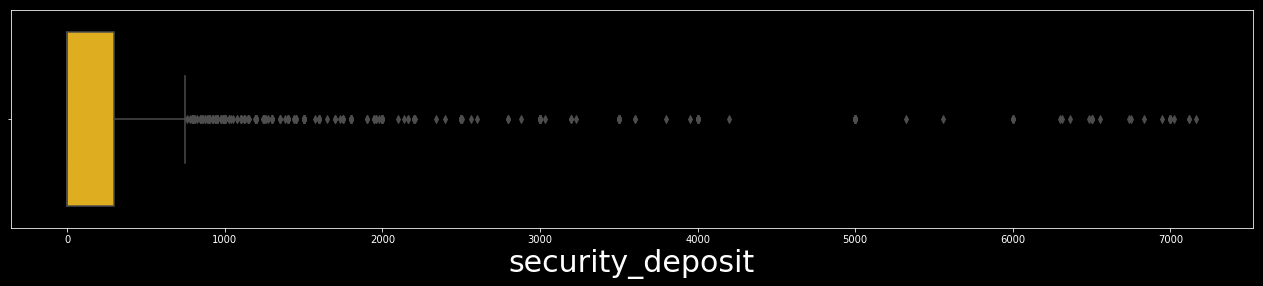

In [11]:
airbnb_cleaned_data["security_deposit"]=airbnb_cleaned_data["security_deposit"].replace({'\$':'',',':''}, regex = True) 
airbnb_cleaned_data["security_deposit"].isnull().sum()
airbnb_cleaned_data["security_deposit"].fillna("0", inplace = True)
airbnb_cleaned_data["security_deposit"]=pd.to_numeric(airbnb_cleaned_data["security_deposit"])
sns.boxplot(airbnb_cleaned_data["security_deposit"], palette = 'Wistia_r')
plt.xlabel("security_deposit", size =30)
plt.subplots_adjust(right=3)
for i in range(90,100 + 1):
    print(f'{i} percentile value is {np.percentile(airbnb_cleaned_data["security_deposit"], i)}')
airbnb_cleaned_data=airbnb_cleaned_data[(airbnb_cleaned_data.security_deposit>=0) & (airbnb_cleaned_data.security_deposit<=2500)]

# Interpretation

----

Secruity deposit column has most of the null values, we are replacing __`null_values`__ with __`Zero`__. Boxplot depicts data has many outliers ( we need to remove these).

We can see that __`99 percentile`__ for __`secruity_deposit`__ has most of values under 2500 and only few are above this, so we are removing the outliers using this.

90 percentile value is 3.0
91 percentile value is 4.0
92 percentile value is 4.0
93 percentile value is 4.0
94 percentile value is 4.0
95 percentile value is 4.0
96 percentile value is 4.0
97 percentile value is 5.0
98 percentile value is 6.0
99 percentile value is 7.0
100 percentile value is 16.0


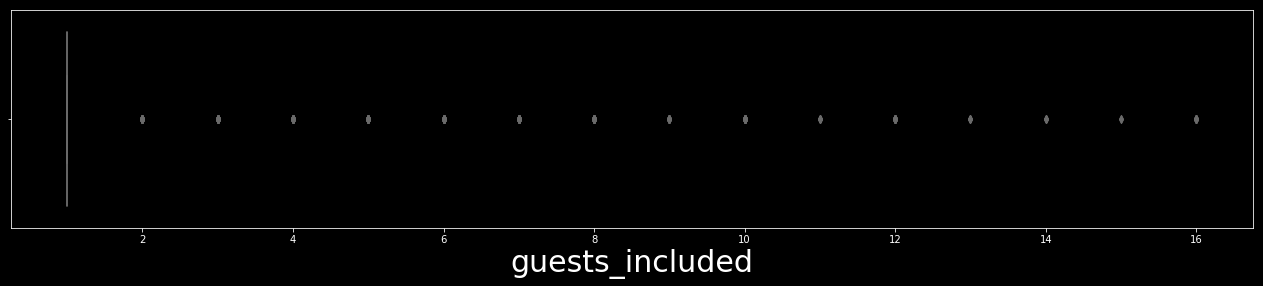

In [12]:
sns.boxplot(airbnb_cleaned_data["guests_included"])
plt.xlabel("guests_included", size =30)
plt.subplots_adjust(right=3)
for i in range(90,100 + 1):
    print(f'{i} percentile value is {np.percentile(airbnb_cleaned_data["guests_included"], i)}')

# Interpretation

----

We have checked the percentiles for the __`guests_included`__ column and conclude that there are no significant outliers in the data.

90 percentile value is 39.0
91 percentile value is 40.0
92 percentile value is 44.0
93 percentile value is 50.0
94 percentile value is 50.0
95 percentile value is 50.0
96 percentile value is 50.0
97 percentile value is 50.0
98 percentile value is 70.0
99 percentile value is 100.0
100 percentile value is 429.0


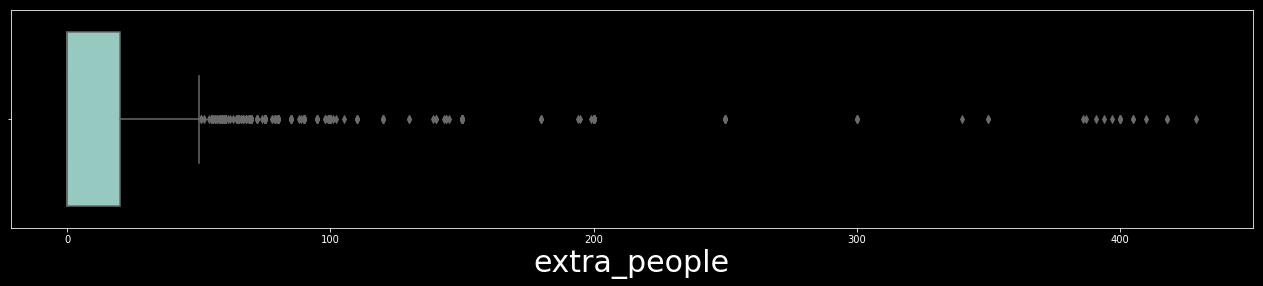

In [13]:
airbnb_cleaned_data["extra_people"]=airbnb_cleaned_data["extra_people"].replace({'\$':'',',':''}, regex = True)
airbnb_cleaned_data["extra_people"]=pd.to_numeric(airbnb_cleaned_data["extra_people"])
sns.boxplot(airbnb_cleaned_data["extra_people"])
plt.xlabel("extra_people", size =30)
plt.subplots_adjust(right=3)
for i in range(90,100+1):
    print(f'{i} percentile value is {np.percentile(airbnb_cleaned_data["extra_people"],i)}')
airbnb_cleaned_data=airbnb_cleaned_data[(airbnb_cleaned_data.extra_people>=0) & (airbnb_cleaned_data.extra_people<=100)]

# Interpretation

----

As we can see most of the data points have less than 100 dollars for one __`extra person`__,so we removed the data points above 100 dollars as outliers.

0 percentile value is 1.0
10 percentile value is 14.0
20 percentile value is 25.0
30 percentile value is 38.0
40 percentile value is 300.0
50 percentile value is 1125.0
60 percentile value is 1125.0
70 percentile value is 1125.0
80 percentile value is 1125.0
90 percentile value is 1125.0
100 percentile value is 10000.0


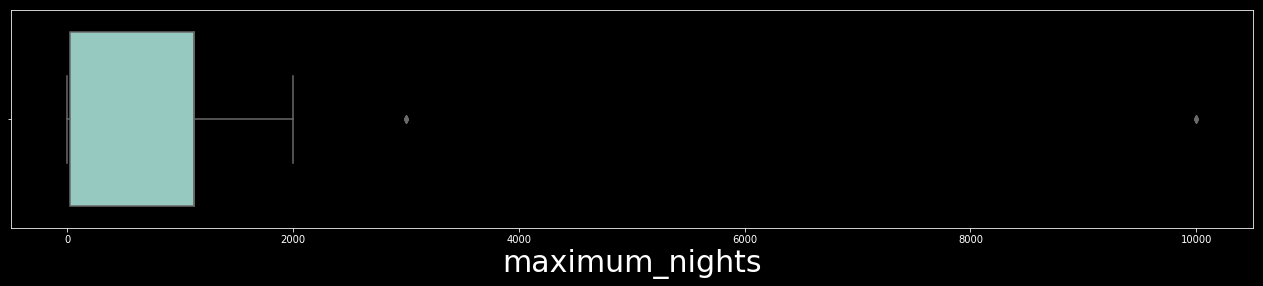

In [14]:
sns.boxplot(airbnb_cleaned_data["maximum_nights"])
plt.xlabel("maximum_nights", size =30)
plt.subplots_adjust(right=3)
for i in range(0,100 + 10,10):
    print(f'{i} percentile value is {np.percentile(airbnb_cleaned_data["maximum_nights"], i)}')
airbnb_cleaned_data=airbnb_cleaned_data[(airbnb_cleaned_data.maximum_nights>=1) & (airbnb_cleaned_data.maximum_nights<=1125)]


# Interpretation

----

Above code checks the column __`maximum_nights`__, we are setting the points range between 1 and 1125 as other data points are outliers and removed those rows.

90 percentile value is 7.0
91 percentile value is 7.0
92 percentile value is 9.0
93 percentile value is 10.0
94 percentile value is 14.0
95 percentile value is 14.0
96 percentile value is 14.0
97 percentile value is 21.0
98 percentile value is 30.0
99 percentile value is 50.0
100 percentile value is 1000.0


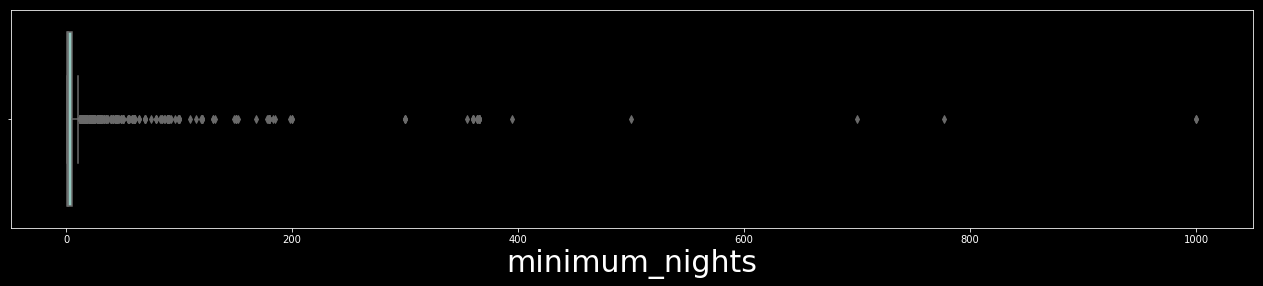

In [15]:
sns.boxplot(airbnb_cleaned_data["minimum_nights"])
plt.xlabel("minimum_nights", size =30)
plt.subplots_adjust(right=3)
for i in range(90,100 + 1):
    print(f'{i} percentile value is {np.percentile(airbnb_cleaned_data["minimum_nights"], i)}')
airbnb_cleaned_data=airbnb_cleaned_data[(airbnb_cleaned_data.minimum_nights>=1) & (airbnb_cleaned_data.minimum_nights<=50)]

# Interpretation

----

Above boxplot shows the data spread in __`minimum_nights`__ column and find that till __`99 percentile`__ data spread is good and we are keeping value till this only.

In [16]:
print("Percentile for the column availability_30",np.percentile(airbnb_cleaned_data['availability_30'],100))
print("Percentile for the column availability_60",np.percentile(airbnb_cleaned_data['availability_60'],100))
print("Percentile for the column availability_365",np.percentile(airbnb_cleaned_data['availability_365'],100))

Percentile for the column availability_30 30.0
Percentile for the column availability_60 60.0
Percentile for the column availability_365 365.0


# Interpretation

----

We are checking __`100`__ percentile for the columns __`availability_30`__ , __`availability_60`__ & __`availability_90`__ and find that values for 100 percentile is 30,60 and 365 for respective columns and we are good with these columns.

90 percentile value is 41.0
91 percentile value is 46.0
92 percentile value is 51.0
93 percentile value is 58.0
94 percentile value is 65.0
95 percentile value is 75.0
96 percentile value is 87.0
97 percentile value is 102.37000000000262
98 percentile value is 125.58000000000175
99 percentile value is 165.0
100 percentile value is 576.0
314.758


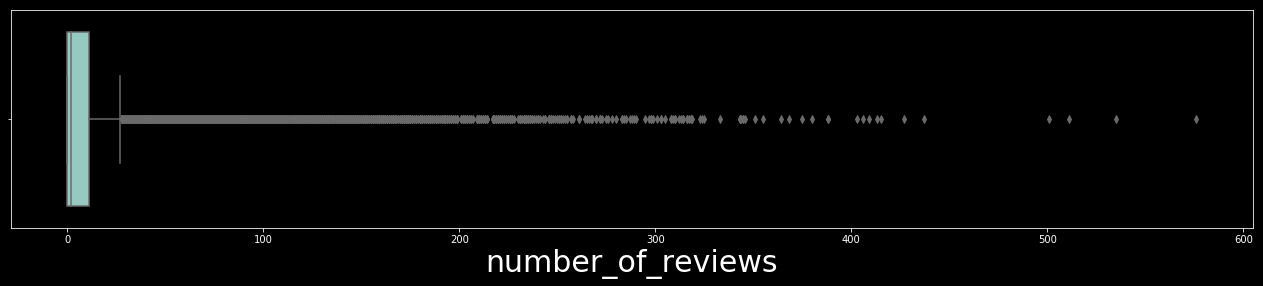

In [17]:
sns.boxplot(airbnb_cleaned_data['number_of_reviews'])
plt.xlabel("number_of_reviews", size =30)
plt.subplots_adjust(right=3)
for i in range(90,100 +1):
    print(f'{i} percentile value is {np.percentile(airbnb_cleaned_data["number_of_reviews"], i)}')
print(np.percentile(airbnb_cleaned_data["number_of_reviews"],99.9))
airbnb_cleaned_data=airbnb_cleaned_data[(airbnb_cleaned_data.number_of_reviews >=0)&(airbnb_cleaned_data.number_of_reviews <=314.758)]

# Interpretation

----

We are checking the data spread in __`number_of_reviews`__ and find that till 99.9 percentile data spread is good.

In [18]:
airbnb_cleaned_data=airbnb_cleaned_data[~airbnb_cleaned_data.host_name.str.contains('\ê', na=False)]
airbnb_cleaned_data=airbnb_cleaned_data[~airbnb_cleaned_data.host_name.str.contains('(Email hidden by Airbnb)', na=False)]
airbnb_cleaned_data=airbnb_cleaned_data[~airbnb_cleaned_data.host_name.str.contains('(Website hidden by Airbnb)', na=False)]
airbnb_cleaned_data=airbnb_cleaned_data[~airbnb_cleaned_data.host_name.str.contains('(Phone Number hidden by Airbnb)', na=False)]
airbnb_cleaned_data=airbnb_cleaned_data[~airbnb_cleaned_data.host_name.str.contains(',', na=False)]
airbnb_cleaned_data=airbnb_cleaned_data[~airbnb_cleaned_data.host_name.str.contains('\∏', na=False)]
airbnb_cleaned_data=airbnb_cleaned_data[~airbnb_cleaned_data.host_name.str.contains('\Ä', na=False)]
airbnb_cleaned_data=airbnb_cleaned_data[~airbnb_cleaned_data.host_name.str.contains('\ú', na=False)]
airbnb_cleaned_data=airbnb_cleaned_data[~airbnb_cleaned_data.host_name.str.contains('\‰', na=False)]
airbnb_cleaned_data=airbnb_cleaned_data[~airbnb_cleaned_data.host_name.str.contains('\Ë', na=False)]
airbnb_cleaned_data=airbnb_cleaned_data[~airbnb_cleaned_data.host_name.str.contains('\≥', na=False)]
airbnb_cleaned_data=airbnb_cleaned_data[~airbnb_cleaned_data.host_name.str.contains('\∑', na=False)]
airbnb_cleaned_data=airbnb_cleaned_data[~airbnb_cleaned_data.host_name.str.contains('\º', na=False)]
airbnb_cleaned_data=airbnb_cleaned_data[~airbnb_cleaned_data.host_name.str.contains('\ü', na=False)]
airbnb_cleaned_data=airbnb_cleaned_data[~airbnb_cleaned_data.host_name.str.contains('\π', na=False)]
airbnb_cleaned_data=airbnb_cleaned_data[~airbnb_cleaned_data.host_name.str.contains('\ô', na=False)]
airbnb_cleaned_data=airbnb_cleaned_data[~airbnb_cleaned_data.host_name.str.contains('√', na=False)]
airbnb_cleaned_data=airbnb_cleaned_data[~airbnb_cleaned_data.host_name.str.contains('\Â', na=False)]
airbnb_cleaned_data=airbnb_cleaned_data[~airbnb_cleaned_data.host_name.str.contains('\Ø', na=False)]
airbnb_cleaned_data=airbnb_cleaned_data[~airbnb_cleaned_data.host_name.str.contains('\Á', na=False)]
airbnb_cleaned_data=airbnb_cleaned_data[~airbnb_cleaned_data.host_name.str.contains('\Å', na=False)]
airbnb_cleaned_data= airbnb_cleaned_data.dropna(axis=0, subset=['host_name'])
airbnb_cleaned_data=airbnb_cleaned_data[~airbnb_cleaned_data.host_location.str.contains('\Ö', na=False)]
airbnb_cleaned_data=airbnb_cleaned_data[~airbnb_cleaned_data.host_location.str.contains('\√', na=False)]
airbnb_cleaned_data= airbnb_cleaned_data.dropna(axis=0, subset=['host_location'])

# Interpretation

----

We are removing the __`special characters`__ or any other value apart from a name from the __`host_name`__ and __`host_location`__ variable.

In [19]:
airbnb_cleaned_data.host_response_rate.fillna(0 , inplace=True)
airbnb_cleaned_data.reviews_per_month.fillna(0 , inplace=True)

# Interpretation

----

We are mapping the __`null values`__ of the __`host_response_rate`__ and __`reviews_per_month`__ varibales with value 0 because we cannot drop the NaN values for these variables.

In [20]:
airbnb_cleaned_data['host_response_rate'] = airbnb_cleaned_data['host_response_rate'].replace('%', '', regex=True)

# Interpretation

----

We are removing the __`%`__ sign from the __`host_response_rate`__ to use it for analysis and plotting.

In [21]:
airbnb_cleaned_data['host_verifications'] = airbnb_cleaned_data['host_verifications'].str.count(',') + 1

In [22]:
airbnb_cleaned_data=airbnb_cleaned_data[~airbnb_cleaned_data.street.str.contains('\†', na=False)]
airbnb_cleaned_data=airbnb_cleaned_data[~airbnb_cleaned_data.street.str.contains('\Ä', na=False)]
airbnb_cleaned_data=airbnb_cleaned_data[~airbnb_cleaned_data.street.str.contains('\Â', na=False)]
airbnb_cleaned_data=airbnb_cleaned_data[~airbnb_cleaned_data.street.str.contains('\Ê', na=False)]
airbnb_cleaned_data=airbnb_cleaned_data[~airbnb_cleaned_data.city.str.contains('\†', na=False)]
airbnb_cleaned_data=airbnb_cleaned_data[~airbnb_cleaned_data.city.str.contains('\Ä', na=False)]
airbnb_cleaned_data=airbnb_cleaned_data[~airbnb_cleaned_data.city.str.contains('\Â', na=False)]
airbnb_cleaned_data=airbnb_cleaned_data[~airbnb_cleaned_data.city.str.contains('\Ê', na=False)]

# Interpretation

----

We are removing the special characters from the variables - __`stree`__ & __`city`__.

In [23]:
airbnb_cleaned_data['amenities'] = airbnb_cleaned_data.amenities.map(lambda x: [i.strip() for i in x.split(",")])
airbnb_cleaned_data['amenities'].head()

id
11156    [{TV, Kitchen, Elevator, "Buzzer/wireless inte...
14250    [{TV, Wifi, "Air conditioning", Kitchen, "Pets...
20865    [{TV, Internet, Wifi, "Air conditioning", Kitc...
26174    [{TV, Wifi, Kitchen, "Free street parking", He...
38073    [{TV, "Cable TV", Wifi, "Air conditioning", Po...
Name: amenities, dtype: object

# Interpretation

----

For Amenities, we are splitting each amenity with a comma.

In [24]:
airbnb_cleaned_data['amenities_count']= airbnb_cleaned_data['amenities'].apply(len)
print(airbnb_cleaned_data['amenities_count'].head())

id
11156    23
14250    33
20865    23
26174    28
38073    23
Name: amenities_count, dtype: int64


# Interpretation

----

After splitting the amenities from the list, we are printing the length of each list for the variable amenities.
We have created a new column named __`amenities_count`__ that is printing the length of each row in the column amenities.

In [25]:
print (airbnb_cleaned_data.shape)
airbnb_cleaned_data.head()

(35485, 50)


name  \
id                                              
11156                    An Oasis in the City   
14250                     Manly Harbour House   
20865      3 BED HOUSE + 1 BED STUDIO Balmain   
26174      COZY PRIVATE ROOM, GREAT LOCATION!   
38073  Modern apartment with pool and parking   

                                             description experiences_offered  \
id                                                                             
11156  Very central to the city which can be reached ...                none   
14250  Beautifully renovated, spacious and quiet, our...                none   
20865  Hi! We are a married professional couple with ...                none   
26174  Double bed in decent sized bedroom, in two bed...                none   
38073  Welcome to my sanctuary - a bright, comfortabl...                none   

                                                 transit  host_id host_name  \
id                                                                            
11156  It is 7 minutes walk to the Kings Cross.train ...    40855   Colleen   
14250  Balgowlah - Manly bus # 131 or #132  (Bus stop...    55948     Heidi   
20865  Balmain is well serviced by buses (from Darlin...    64282     Fiona   
26174                                                NaN   110561    Amanda   
38073  OPAL CARDS is the easiest and cheapest way to ...   103476  Prasanna   

                                 host_location host_response_rate  \
id                                                                  
11156  Potts Point, New South Wales, Australia                 50   
14250       Sydney, New South Wales, Australia                100   
20865       Sydney, New South Wales, Australia                100   
26174       Sydney, New South Wales, Australia                100   
38073    Warrawong, New South Wales, Australia                100   

      host_is_superhost  host_listings_count       ...        \
id                                                 ...         
11156                 0                1.000       ...         
14250                 0                2.000       ...         
20865                 1                2.000       ...         
26174                 0                1.000       ...         
38073                 0                2.000       ...         

       number_of_reviews number_of_reviews_ltm requires_license  \
id                                                                
11156                185                    10                0   
14250                  2                     1                0   
20865                 16                     1                0   
26174                 45                     7                0   
38073                 63                     0                0   

      instant_bookable cancellation_policy require_guest_phone_verification  \
id                                                                            
11156                0               5.000                                0   
14250                0               6.000                                0   
20865                0               6.000                                1   
26174                0               5.000                                0   
38073                0               6.000                                1   

      calculated_host_listings_count reviews_per_month  \
id                                                       
11156                              1             1.580   
14250                              2             0.050   
20865                              1             0.170   
26174                              1             0.450   
38073                              2             0.600   

                                             house_rules amenities_count  
id                                                                        
11156        Be considerate.   No showering after 2330h.            

# Interpretation

----

Above output display values after data cleaning and it has __`35485 rows`__  & __`50 columns`__.

# __`Starting with the Data Analysis and Visualization`__

In [26]:
all_house_rules = ' '.join(airbnb_cleaned_data['house_rules'].iloc[0:12].str.lower())

# Interpretation

----

Here, we are making use of the column `house_rules` from our dataframe `airbnb_cleaned_data` to perform a __`word cloud analysis`__ on this column since house_rules contains text regarding the rules that tenants should keep in mind while booking a particular listing.

In [27]:
from nltk.corpus import stopwords
stop_words = set(stopwords.words("english"))
stop_words.add ('please')
stop_words.add ('apartment')
print(stop_words)

{"weren't", 'doesn', 'its', 'her', 'where', 'no', 'was', 'so', 're', 'under', 'just', 'he', 'not', 'hadn', 'their', 'will', 'mightn', 'both', 'm', 'after', 'own', "isn't", 'my', 'other', 'itself', "you'd", 'about', 'than', 'yourself', 'has', "wasn't", 'are', 'wouldn', "don't", 'any', 'were', 'me', 'while', 'ourselves', 'further', 'does', "wouldn't", 'i', 'myself', "shouldn't", 'for', 'as', 'all', 'them', 'here', 'themselves', 'above', "needn't", 'these', 'it', 'y', 'we', 'his', 'our', 'who', 'be', 'down', 'through', 'she', 'being', 'ma', "should've", 'now', 'below', 'when', "you've", "shan't", 'over', 'can', 'some', 'same', 'please', "it's", 'weren', 'yours', 'or', 'been', 'such', 'by', 'herself', 'but', 'have', 'doing', 'll', "hadn't", 'before', 'shouldn', 'theirs', "she's", "you'll", 'apartment', 'most', 'this', 'the', 'should', 'too', 've', "haven't", 'again', 'o', 'from', 'won', 'out', 'there', 'each', 'then', 'whom', 'very', 'because', 'how', 'haven', 'those', 'if', 'ours', 'had',

# Interpretation

----

Here, we are have imported `stopwords` from `nltk.corpus`. After the import we stored all the english stopwords in `stop_words`. This list is a pre-defined list of stopwords in NLTK. After that, we are adding some stopwords from the column `house_rules` and printed the appended list out as output.

In [28]:
wordcloud = WordCloud(stopwords=stop_words,
                      background_color="grey",
                      max_words=10000).generate(all_house_rules)

# Interpretation

----

We are creating a WordCloud from `house_rules` and in the __WordCloud__ we are displaying a maximum of 1000 words. The concept of WordCloud is that, the most frequent word occured will be displayed with a bigger font size as compared to the other words that occur less frequently with a small font size. The words with big font denotes that they are of importance.

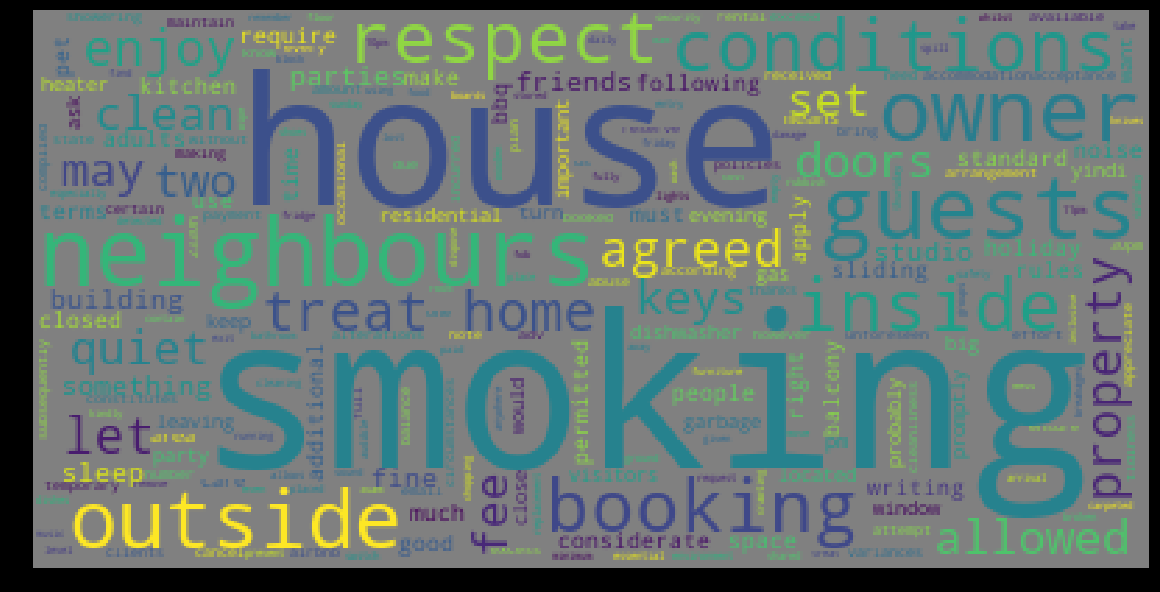

In [29]:
rcParams['figure.figsize'] = 20, 20
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

# Interpretation

----

We have printed the __`WordCloud`__ for the column `house_rules` for limited number of rows and as can be seen from the WordCloud, there are multiple words that occur frequently in our text, out of which __smoking__ is one which denotes that most of the listings have a common house rule that says "__Smoking not allowed__"

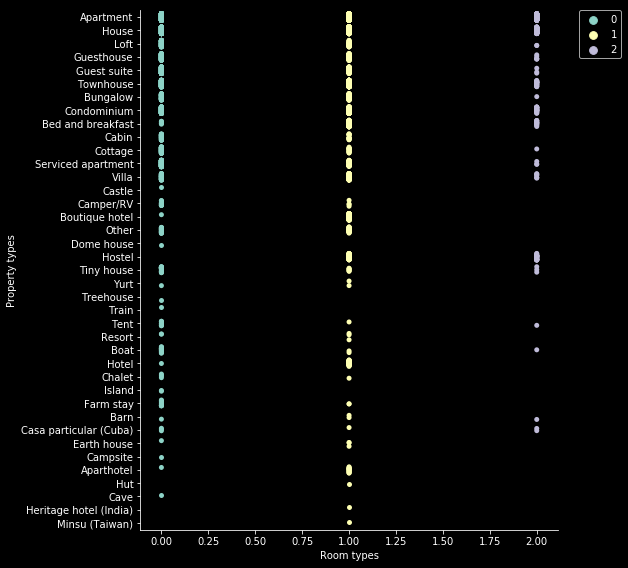

In [30]:
sns.catplot(x='room_type', y='property_type', 
            data=airbnb_cleaned_data,jitter='0.25',
            height=8,hue="room_type")
plt.xlabel("Room types")
plt.ylabel("Property types")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()

# Interpretation

----

Above plot shows the comparison between different types of __`property`__ and __`room types`__. Here, we used numeric values to depict the __`room type`__ such as __`0`__ stands for Entire house or apartment , __`1`__ stands for __`Private room`__ and __`2`__ stands for __`Shared room`__.

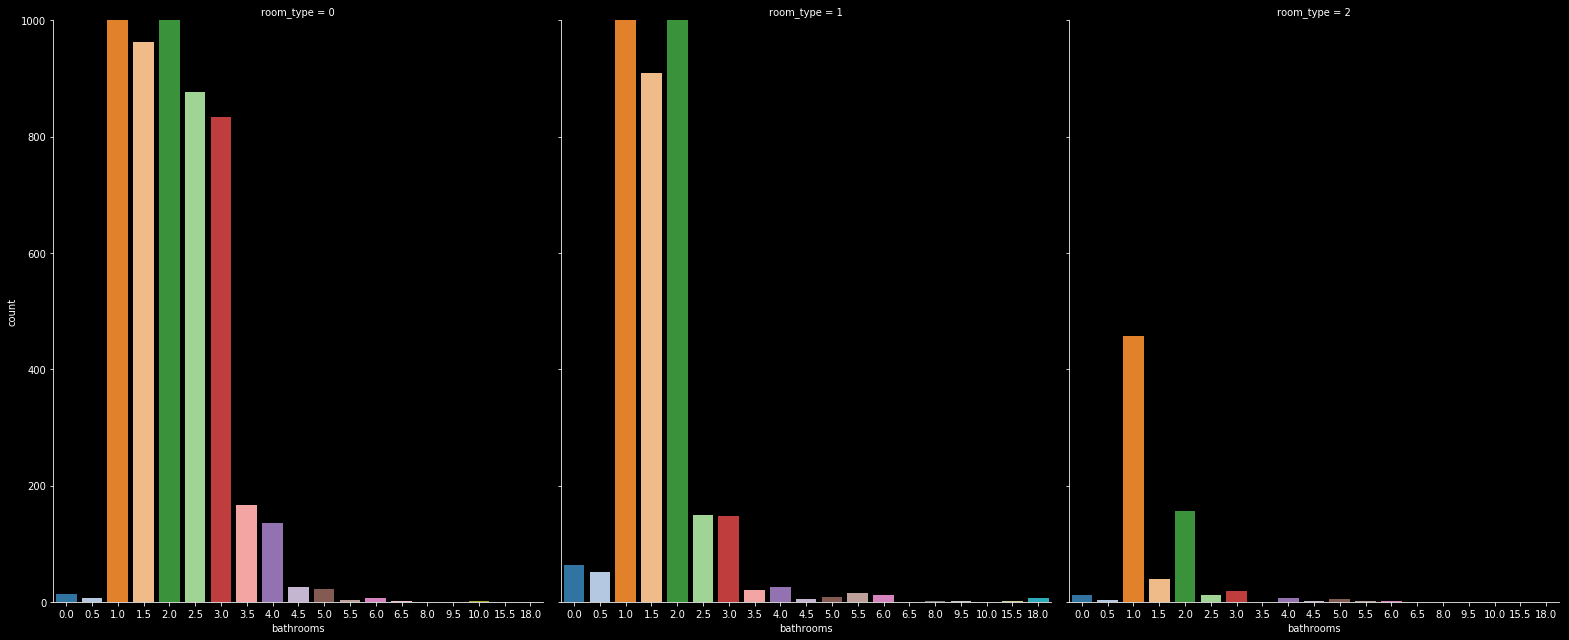

In [31]:
sns.factorplot("bathrooms", col="room_type", col_wrap=4,
                data=airbnb_cleaned_data,
                kind="count", height=9, aspect=.8, 
                palette='tab20')
plt.ylim(0,1000)
plt.show()

# Interpretation

----

We are checking the number of __`bathrooms`__ in each category of the __`room`__ types. We conclude that the __`entire house`__ has most number of bathrooms. All of the three types are mostly providing 1 & 2 bathrooms.
(0 <- Entire house, 1 <- Private Room , 2 <- Shared Room)

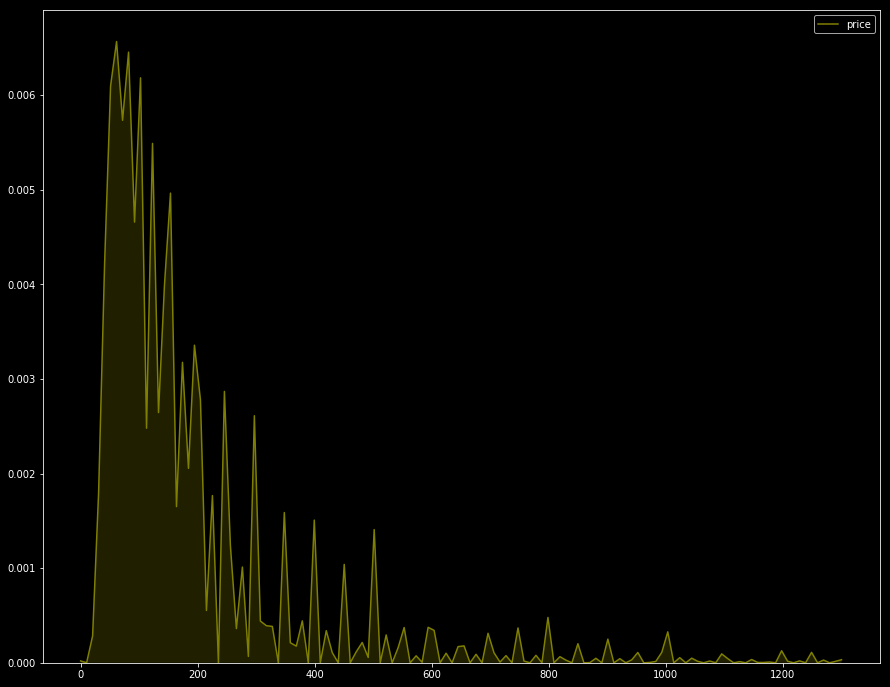

In [32]:
plt.figure(figsize=(15,12))
sns.kdeplot(airbnb_cleaned_data['price'], shade=True, bw=.05, color="olive")

# Interpretation

----

We have inspected the __`price`__ column to find out what is the most common price in NSW. After plotting the KDE-Plot, we understand that the maximum price ranges between 100 dollars to 180 dollars.

In [33]:
values = ','.join(str(v) for v in airbnb_cleaned_data.transit)
words = values.split()
resulting_count = collections.Counter(words).most_common(100)

In [34]:
transit_1 = pd.DataFrame(resulting_count)
transit_1.columns = ['a', 'b']

In [35]:
transit_updated=transit_1[(transit_1['a']=="train") | (transit_1["a"]=="bus") | (transit_1["a"]=="walk") | (transit_1["a"]=="station") | (transit_1["a"]=="buses") | (transit_1["a"]=="Station") | (transit_1["a"]=="walking") | (transit_1["a"]=="ferry")  | (transit_1["a"]=="car") | (transit_1["a"]=="Bus") | (transit_1["a"]=="Train") | (transit_1["a"]=="Uber")]

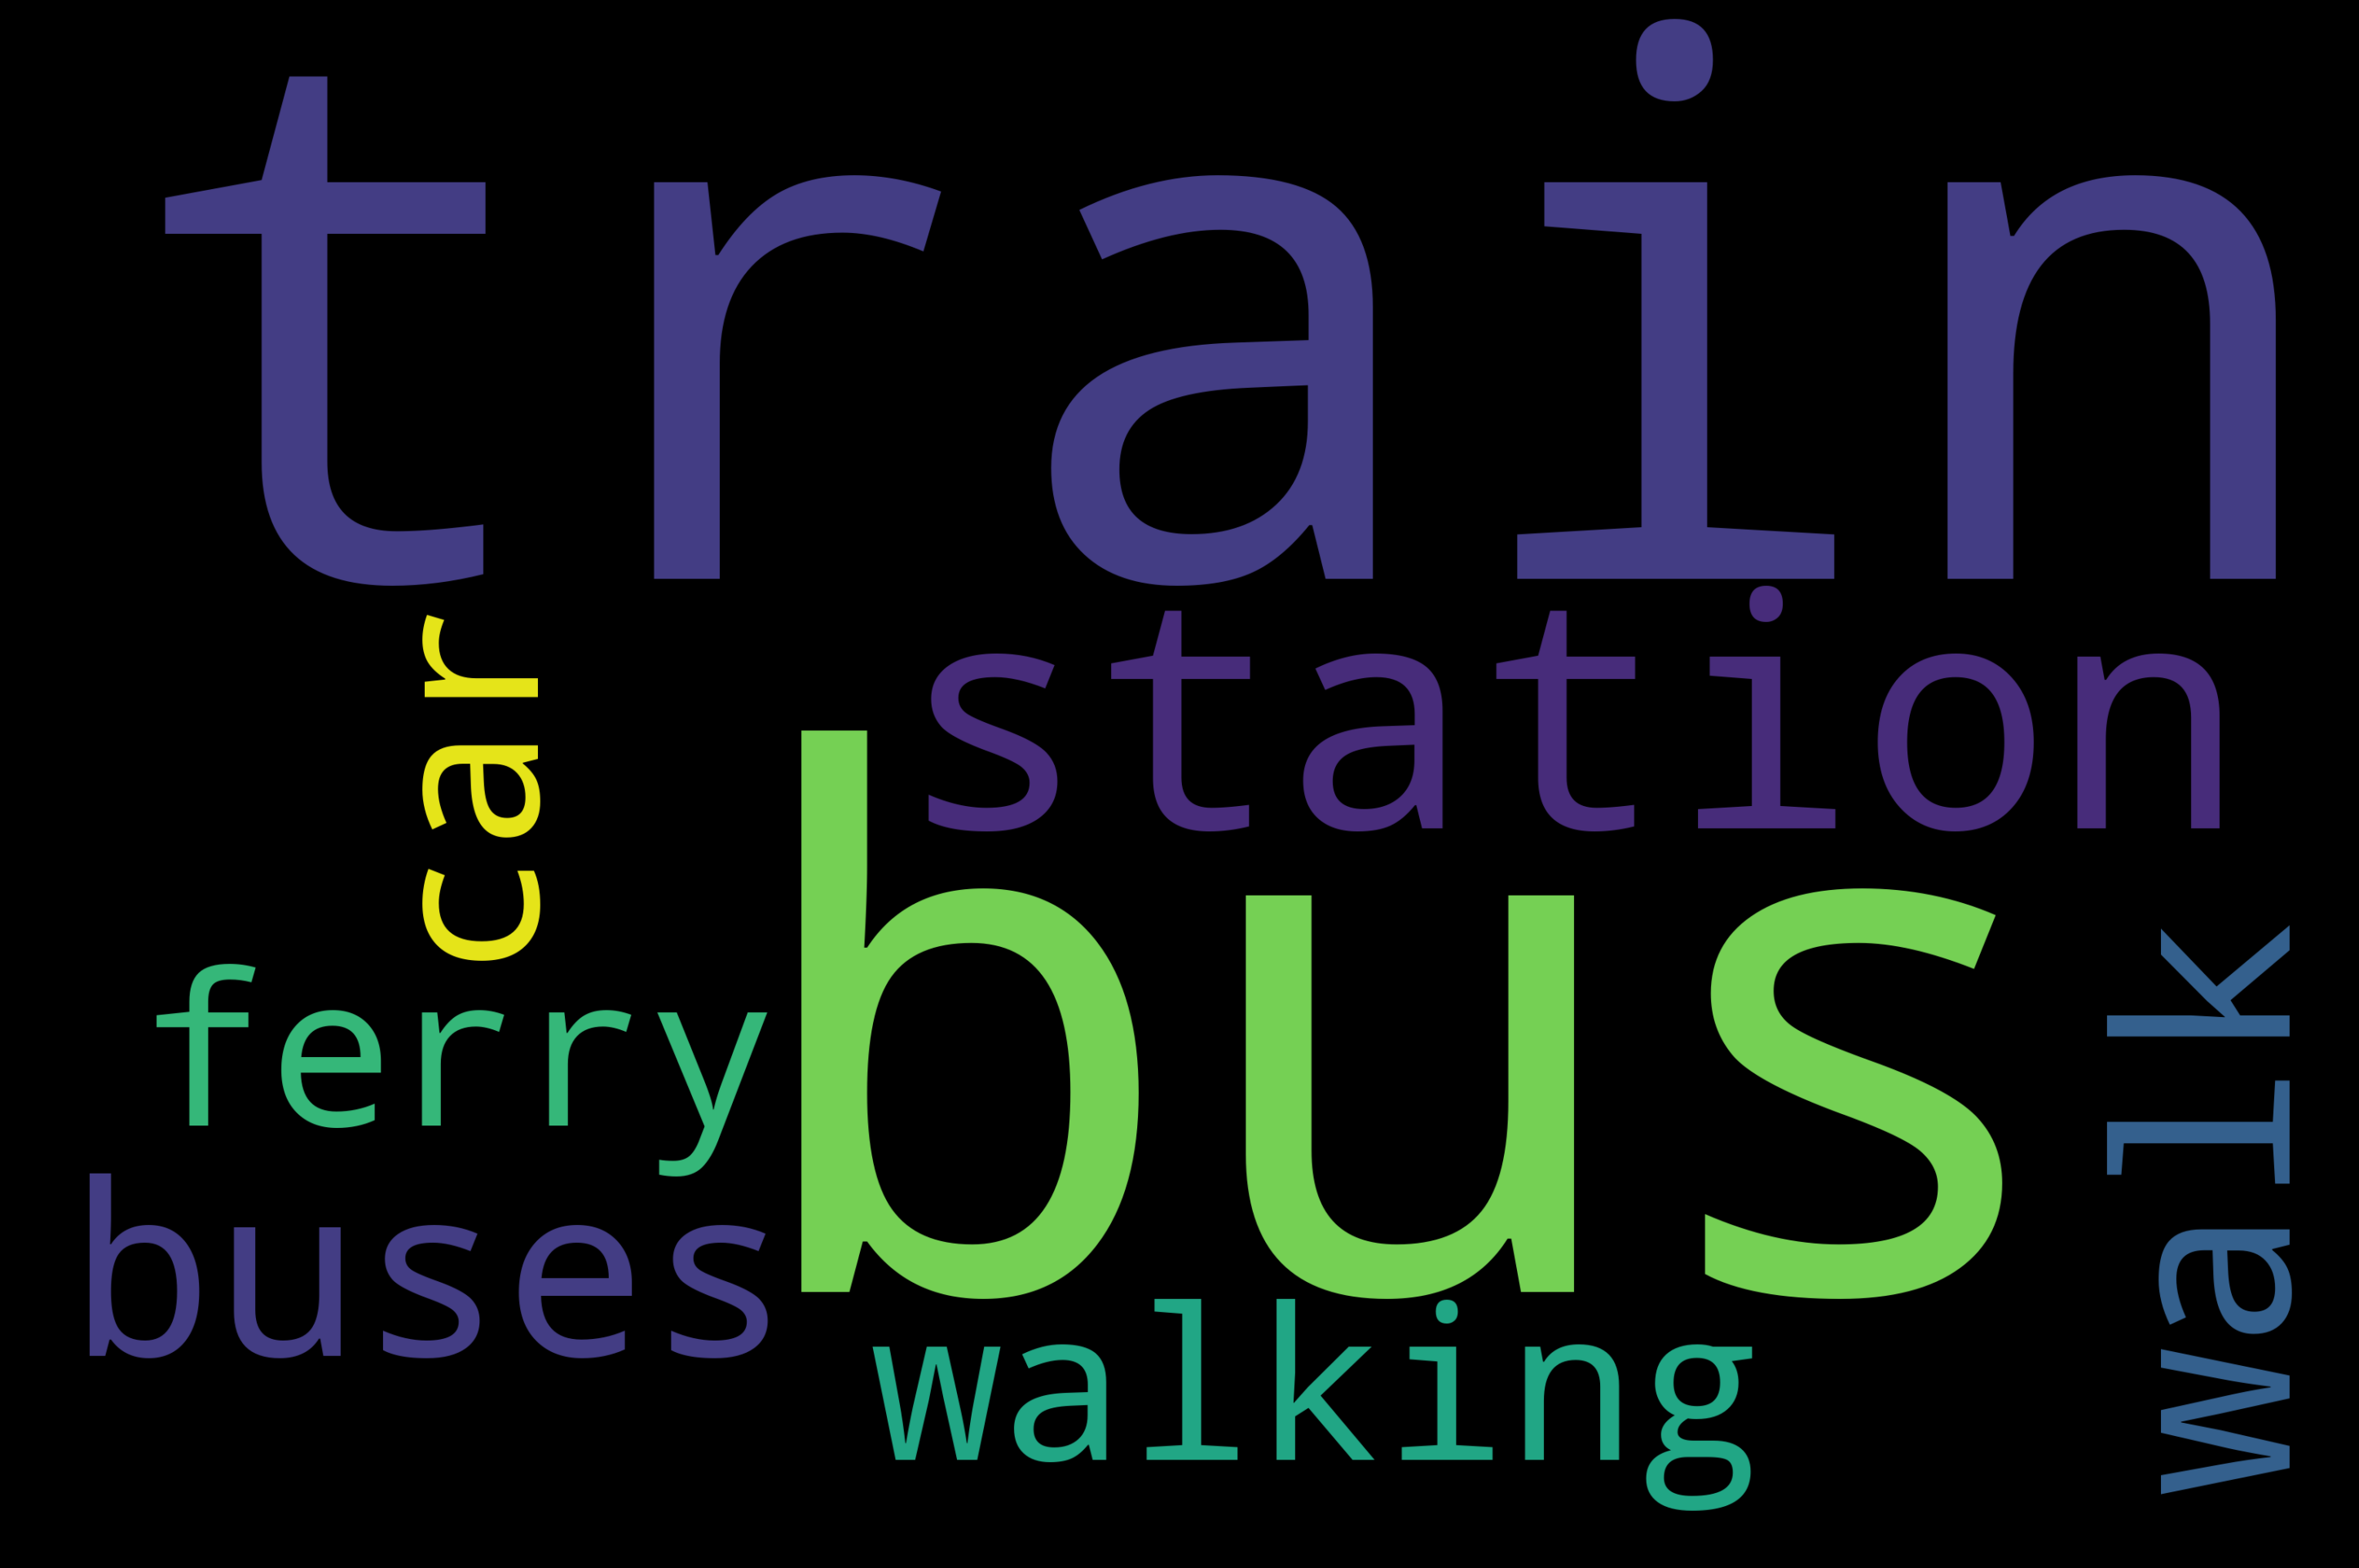

In [36]:
from wordcloud import WordCloud, STOPWORDS
STOPWORDS.add ("dtype")
STOPWORDS.add ("Name")
STOPWORDS.add ("object")
import matplotlib.pyplot as plt
text = transit_updated.a
wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'black',
    stopwords = STOPWORDS).generate(str(text))
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

# Interpretation

----

We are checking which transport method is the most common in __`transit`__ . We conclude that in __`transit`__ , train  & bus  are the most commonly suggested and used transits. This is followed by walking , ferry  & Uber  respectively.

In [37]:
airbnb_corr=airbnb_cleaned_data[["price","room_type","bed_type","security_deposit","is_location_exact","availability_30","availability_60","availability_90","availability_365","number_of_reviews_ltm"]]
airbnb_corr.corr().iplot(kind='heatmap',colorscale="Blues",title="Correlation matrix : Airbnb dataset")

# Interpretation

----

We are checking the __`correlation`__ of various variables of airbnb dataset __`price , room_type , bed_type ,security_deposit, is_location_exact, availability_30,availability_60,availability_90, availability_365, number_of_reviews_ltm`__ and come up with below conclusions :-

1) __`Price`__ is highly related with __`secruity_deposit`__ and least related with the type of room.

2) Type of the room is weakly related with every other variable choosen for correlation matrix.

3) Location is exact or not is not related /depends upon price, secruity deposit , type of room or bed type.

In [38]:
#bifurcate_superhost = pd.crosstab(index=airbnb_cleaned_data["host_is_superhost"],columns=airbnb_cleaned_data["host_is_superhost"])

In [39]:
"""bifurcate_superhost.plot(kind="bar", figsize=(15,12),stacked=True)
plt.tick_params(labelsize=10)
plt.xlabel("Host is Superhost or not" ,fontsize =15)
plt.ylabel("Frequency", fontsize=15)
plt.show()"""

'bifurcate_superhost.plot(kind="bar", figsize=(15,12),stacked=True)\nplt.tick_params(labelsize=10)\nplt.xlabel("Host is Superhost or not" ,fontsize =15)\nplt.ylabel("Frequency", fontsize=15)\nplt.show()'

# Interpretation 


----

From above plot we can conlcude that our dataset has __`30373 non super host`__ and __`5112 super hosts`__.

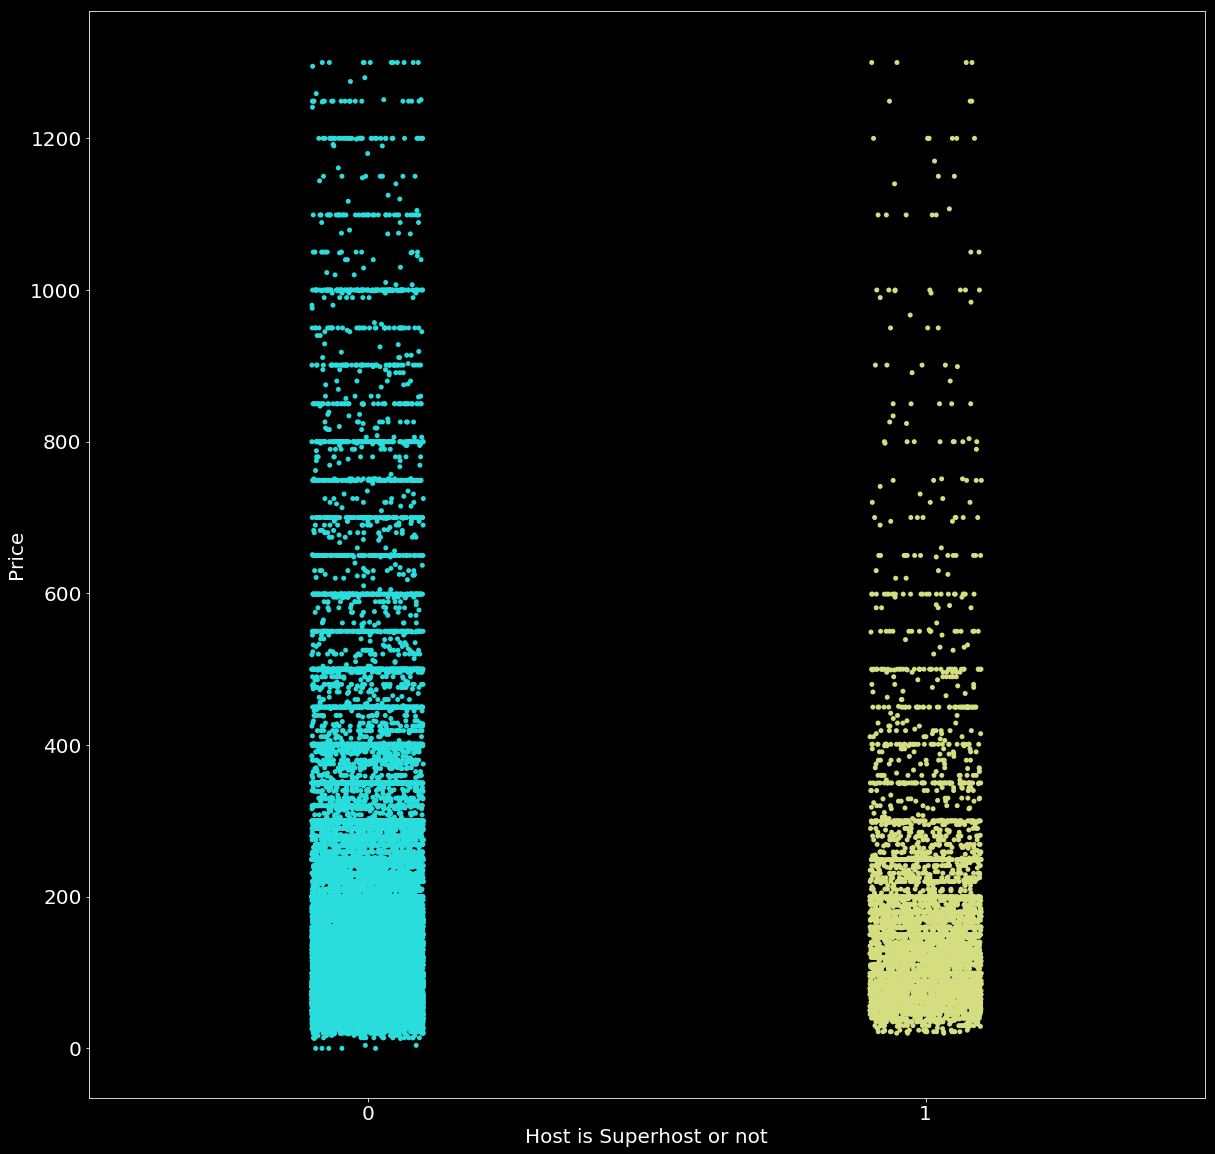

In [40]:
sns.stripplot(x='host_is_superhost',y='price',data=airbnb_cleaned_data,palette='rainbow',jitter=0.1)
plt.xlabel("Host is Superhost or not", fontsize=20)
plt.tick_params(labelsize=20)
plt.ylabel ("Price",fontsize=20)
plt.show()

# Interpretation

-----

We are checking the __`price`__ of the listing depends upon whether __`host is a superhost or not`__. We conclude that the most listings have price around 100- 300 dollars whose host is not a superhost and equally spread till 1200 dollars whereas superhost have price most of listings have price between 100-200 dollars and spreaded values till 1200 dollars.

Text(0,0.5,'Total Reviews')

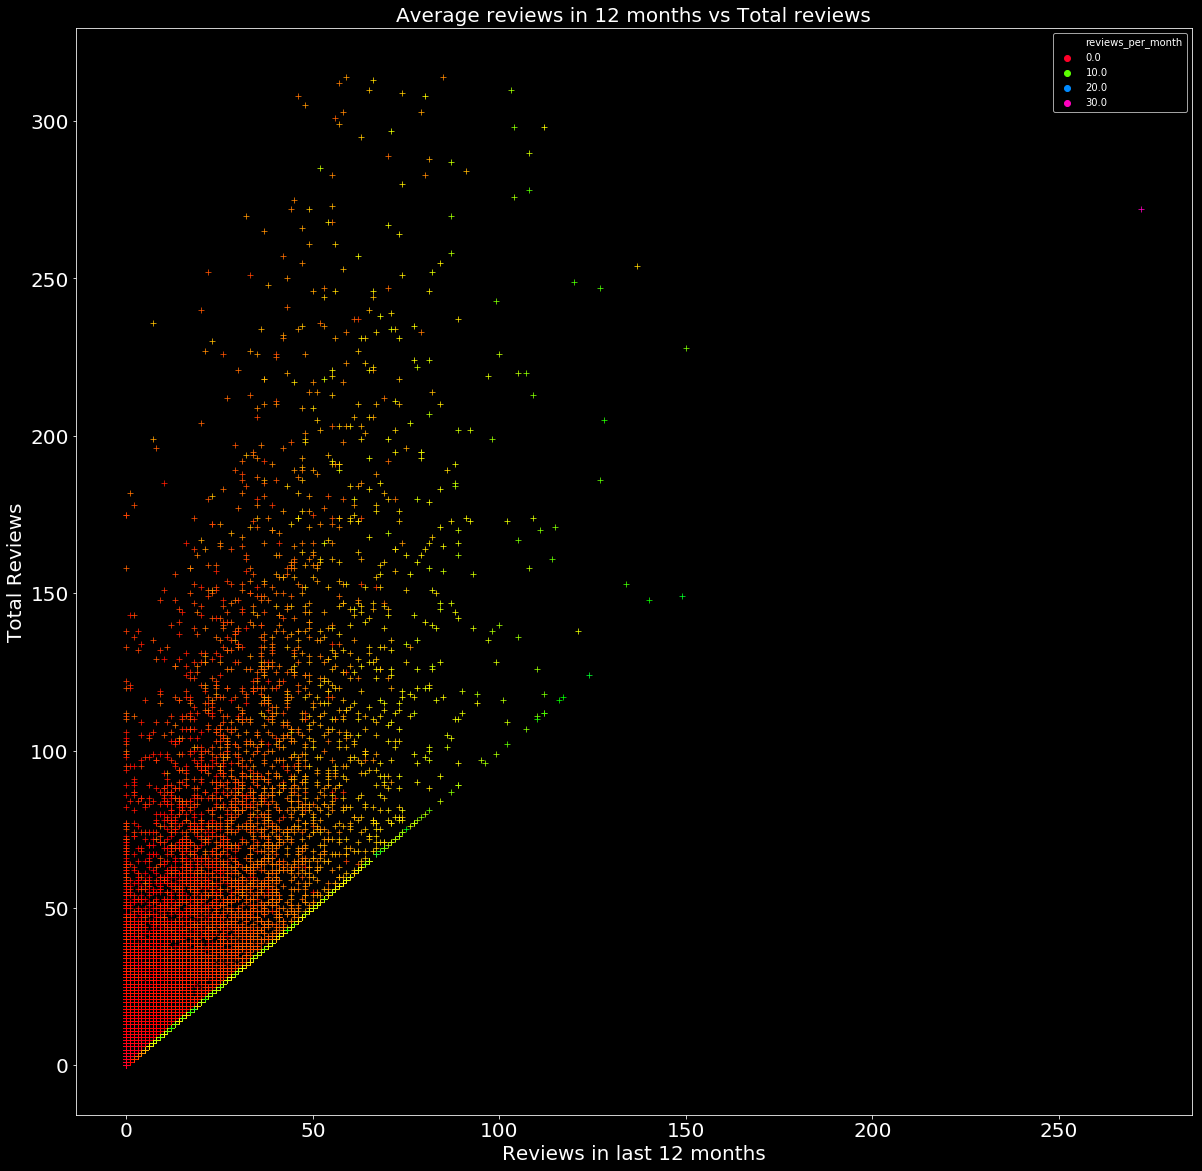

In [41]:
plt.style.use ("dark_background")
plt.figure(figsize=(20, 20))
sns.scatterplot(x="number_of_reviews_ltm", y="number_of_reviews", data=airbnb_cleaned_data, 
                hue = "reviews_per_month", marker = '+', markers= 50, palette = 'gist_rainbow')
plt.title ("Average reviews in 12 months vs Total reviews", fontsize = 20)
plt.xlabel ("Reviews in last 12 months", fontsize = 20)
plt.tick_params(labelsize = 20)
plt.ylabel ("Total Reviews", fontsize = 20)

# Interpretation

----

This scatter plot signifies the relationship between the columns __`number_of_reviews`__ and __`number of reviews_ltm`__ for all the respective listings along with the category __`reviews_per_month`__. As we can see that the total number of reviews are nicely spread and goes in relation with the Average number of reviews per month. We can clonclude that most the hosts have provided reviews for the listings.

In [42]:
import plotly.express as px
fig = px.scatter_3d(airbnb_cleaned_data, x='availability_30', 
                    y='availability_60', z='availability_90',
                    color='room_type')
fig.show()

# Interpretation

----

After plotting the 3D Scatterplot, we discover that in the room availabilities as per __`availability_30`__ , __`availability_60`__ , __`availability_90`__ , the most common __`room_type`__ is 0 which is 'Entire Home / Apartment', is the most booked type of room and is also available in the maximum cases. This is followed by __`room_type`__ = 1, which is 'Private Room' and lastly, 'Shared Room', which is the least booked.

Text(0,0.5,'price')

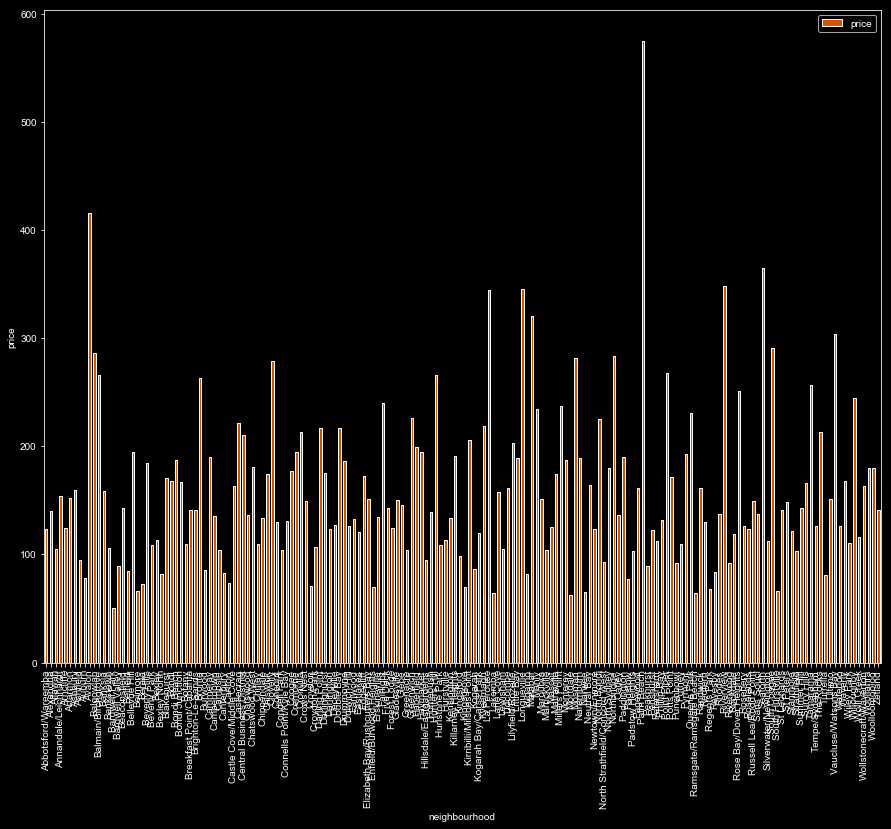

In [73]:
neighb=airbnb_cleaned_data.groupby('neighbourhood').mean()[['price']]
sns.set_style("ticks")
plt.style.use("dark_background")
neighb.plot(kind='bar',figsize=(15,12),color='#D35400')
plt.xlabel("neighbourhood")
plt.ylabel("price")

Text(0,0.5,'price')

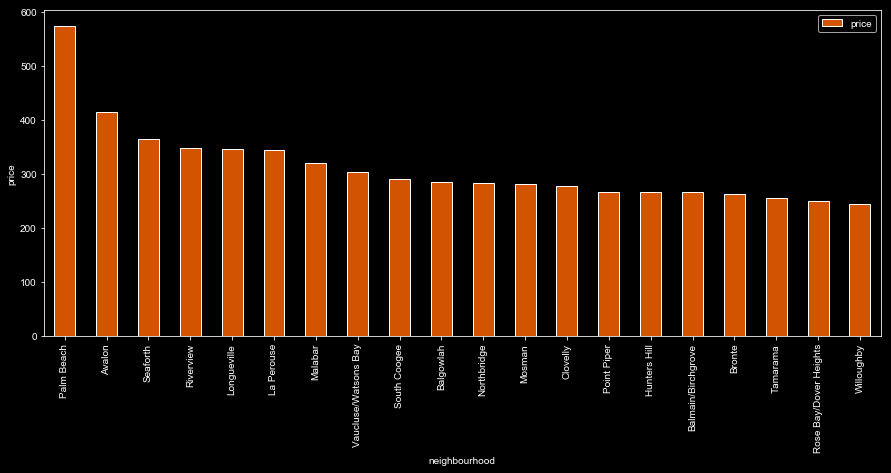

In [74]:
sorted_data=neighb.sort_values('price', axis=0, ascending=False, inplace=False, kind='quicksort', na_position='last')
plt.style.use("dark_background")
top20=sorted_data.iloc[:20]
top20.plot(kind='bar',figsize=(15,6),color='#D35400')
plt.xlabel("neighbourhood")
plt.ylabel("price")

Text(0,0.5,'price')

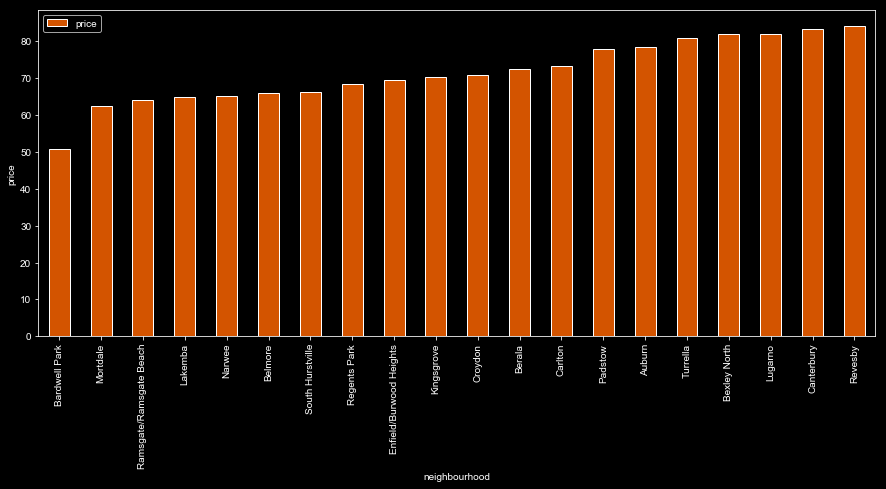

In [75]:
sort_asc=neighb.sort_values('price', axis=0, ascending=True, inplace=False, kind='quicksort', na_position='last')
least20=sort_asc.iloc[:20]
plt.style.use("dark_background")
least20.plot(kind='bar',figsize=(15,6),color='#D35400')
plt.xlabel("neighbourhood")
plt.ylabel("price")

Text(0,0.5,'price')

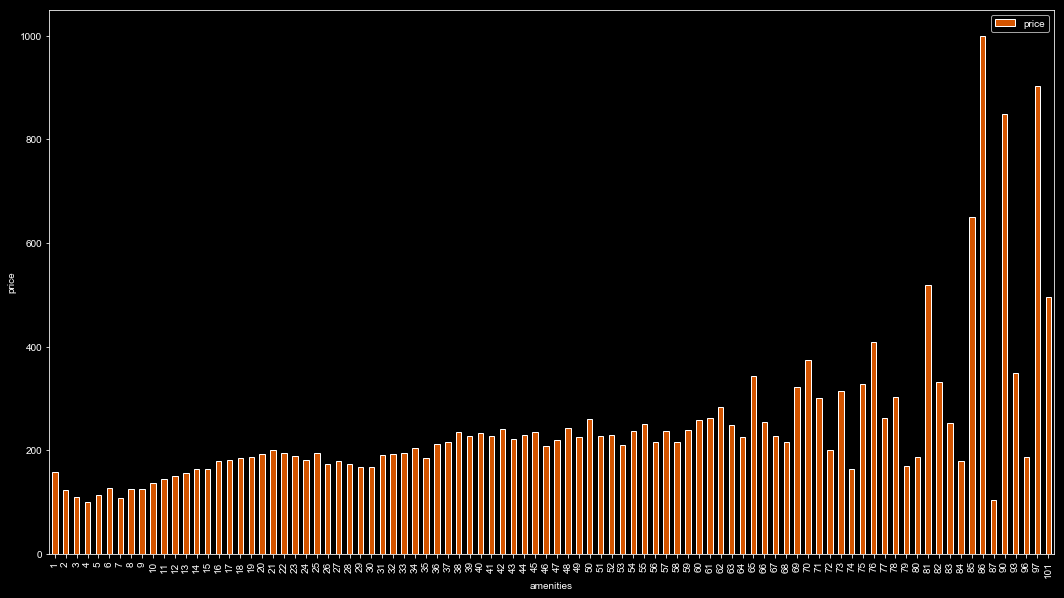

In [65]:
amen=airbnb_cleaned_data.groupby('amenities_count').mean()[['price']]
sns.set_style("ticks")
plt.style.use ("dark_background")
amen.plot(kind='bar',figsize=(18,10),color='#D35400')
plt.xlabel("amenities")
plt.ylabel("price")


Text(0,0.5,'price')

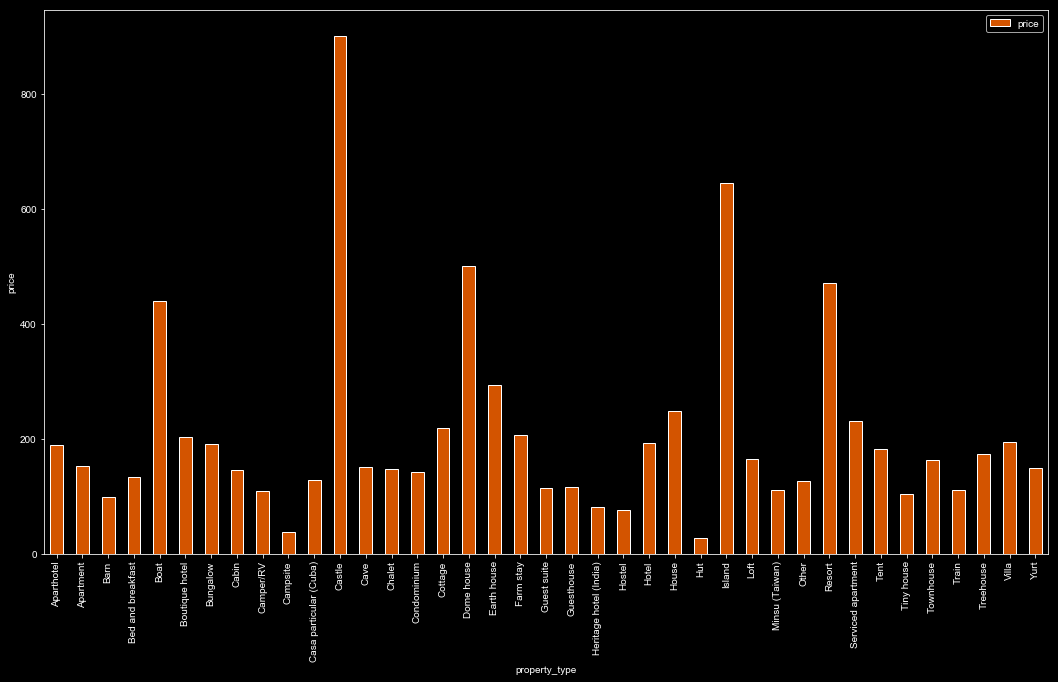

In [63]:
prop_type=airbnb_cleaned_data.groupby('property_type').mean()[['price']]
sns.set_style("ticks")
plt.style.use ("dark_background")
prop_type.plot(kind='bar',figsize=(18,10),color='#D35400')
plt.xlabel("property_type")
plt.ylabel("price")


Text(0,0.5,'percentage')

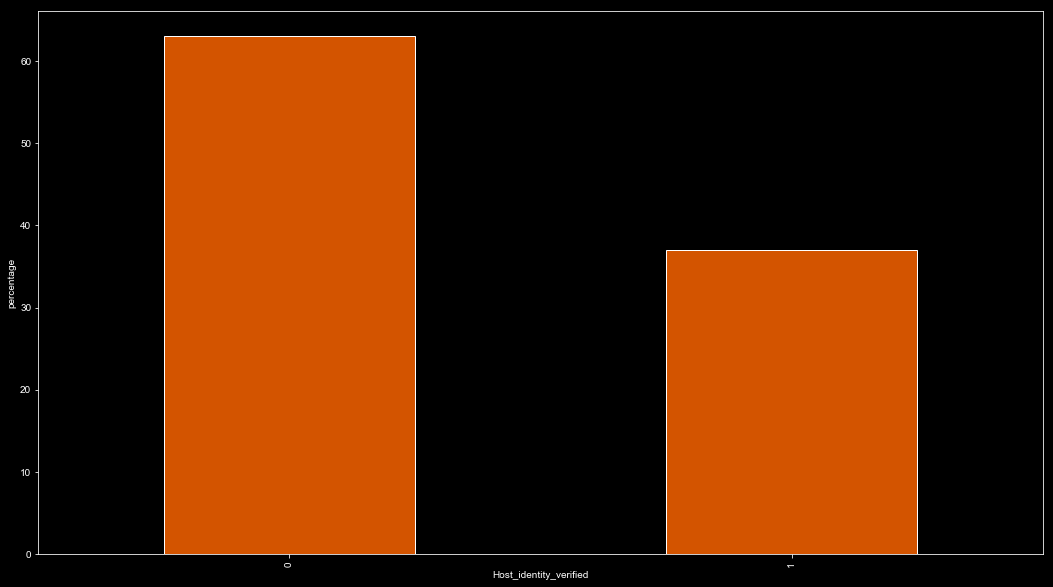

In [67]:
percentage=airbnb_cleaned_data.host_identity_verified.value_counts()/airbnb_cleaned_data.shape[0]*100
plt.style.use ("dark_background")
percentage.plot(kind="bar",color='#D35400', figsize = (18,10))
plt.xlabel("Host_identity_verified")
plt.ylabel("percentage")

# Interpretation 

----

60% of the hosts details are not verified by the Airbnb while 35% of the hosts are only verified by the airbnb.

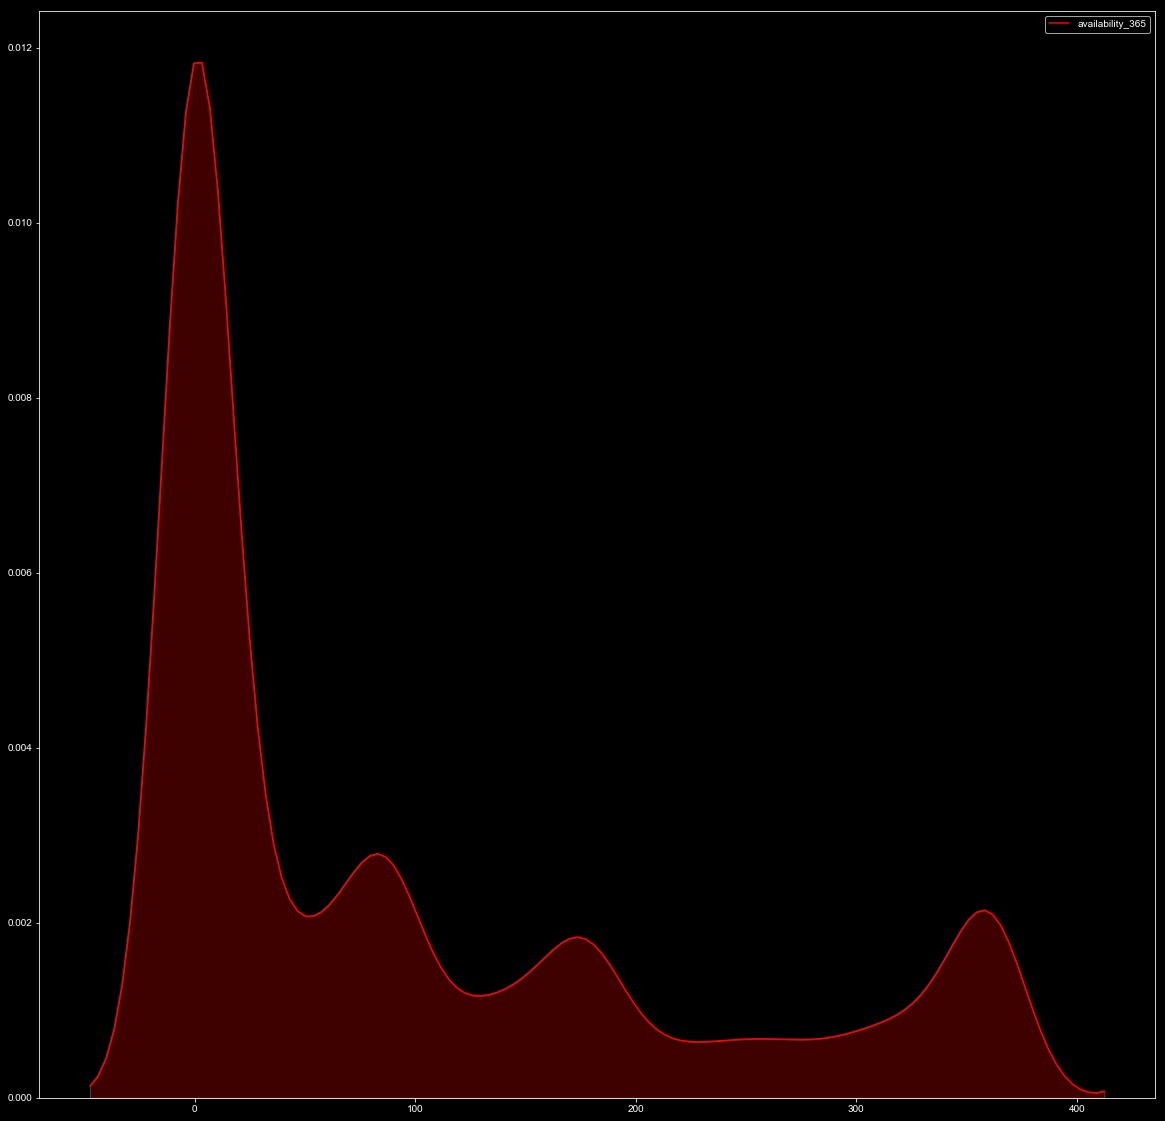

In [70]:
plt.style.use ("dark_background")
sns.kdeplot(airbnb_cleaned_data.availability_365, shade=True, color="r")

# Interpretation

----

In a year most of the accomodations are not available while very few are available all the 365 days in year.

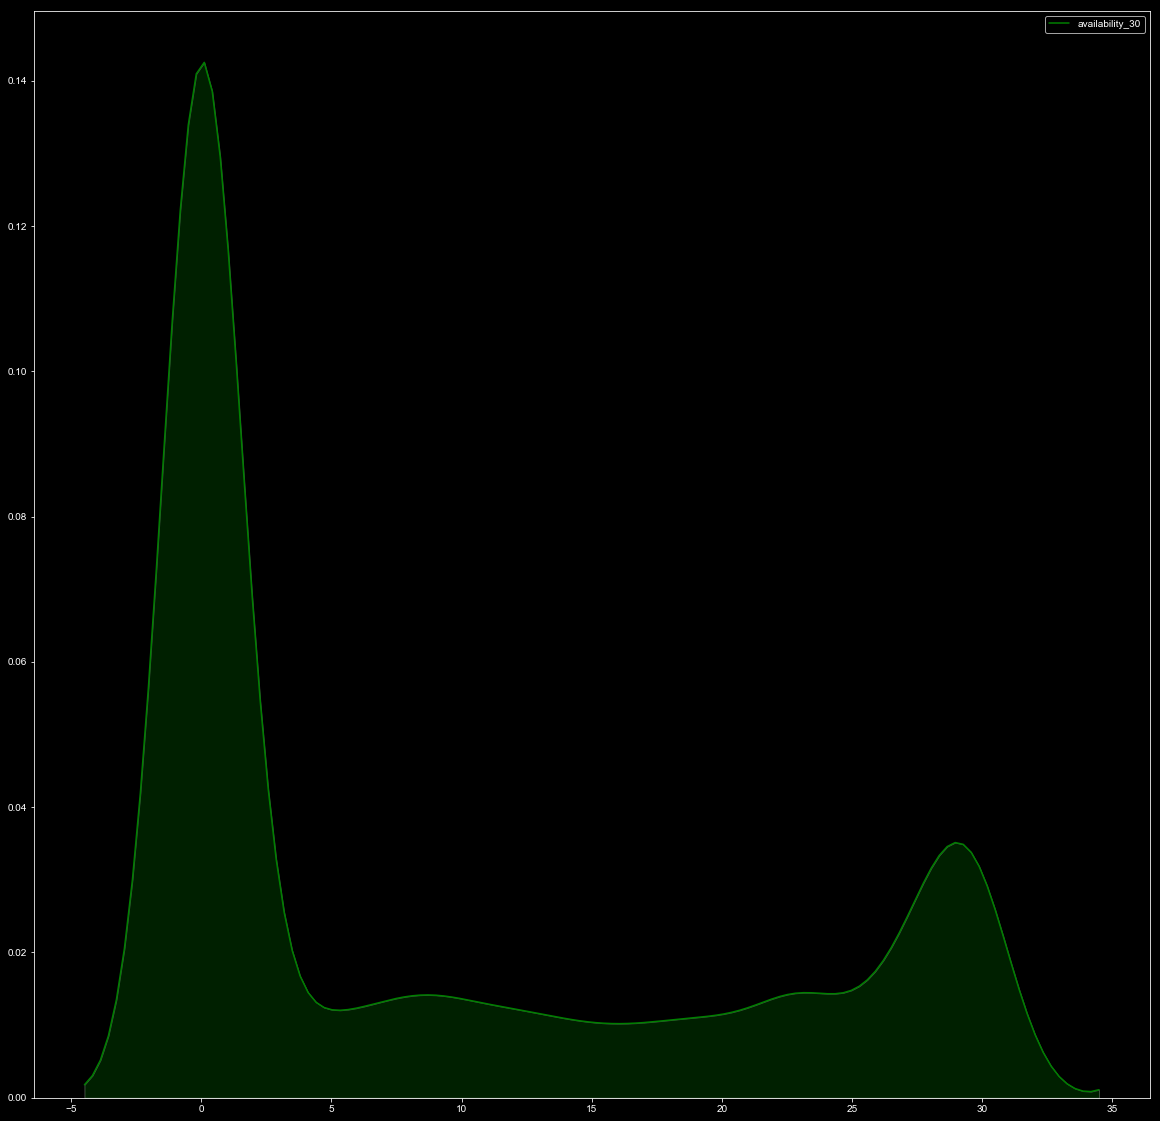

In [71]:
plt.style.use ("dark_background")
sns.kdeplot(airbnb_cleaned_data.availability_30, shade=True, color="g")

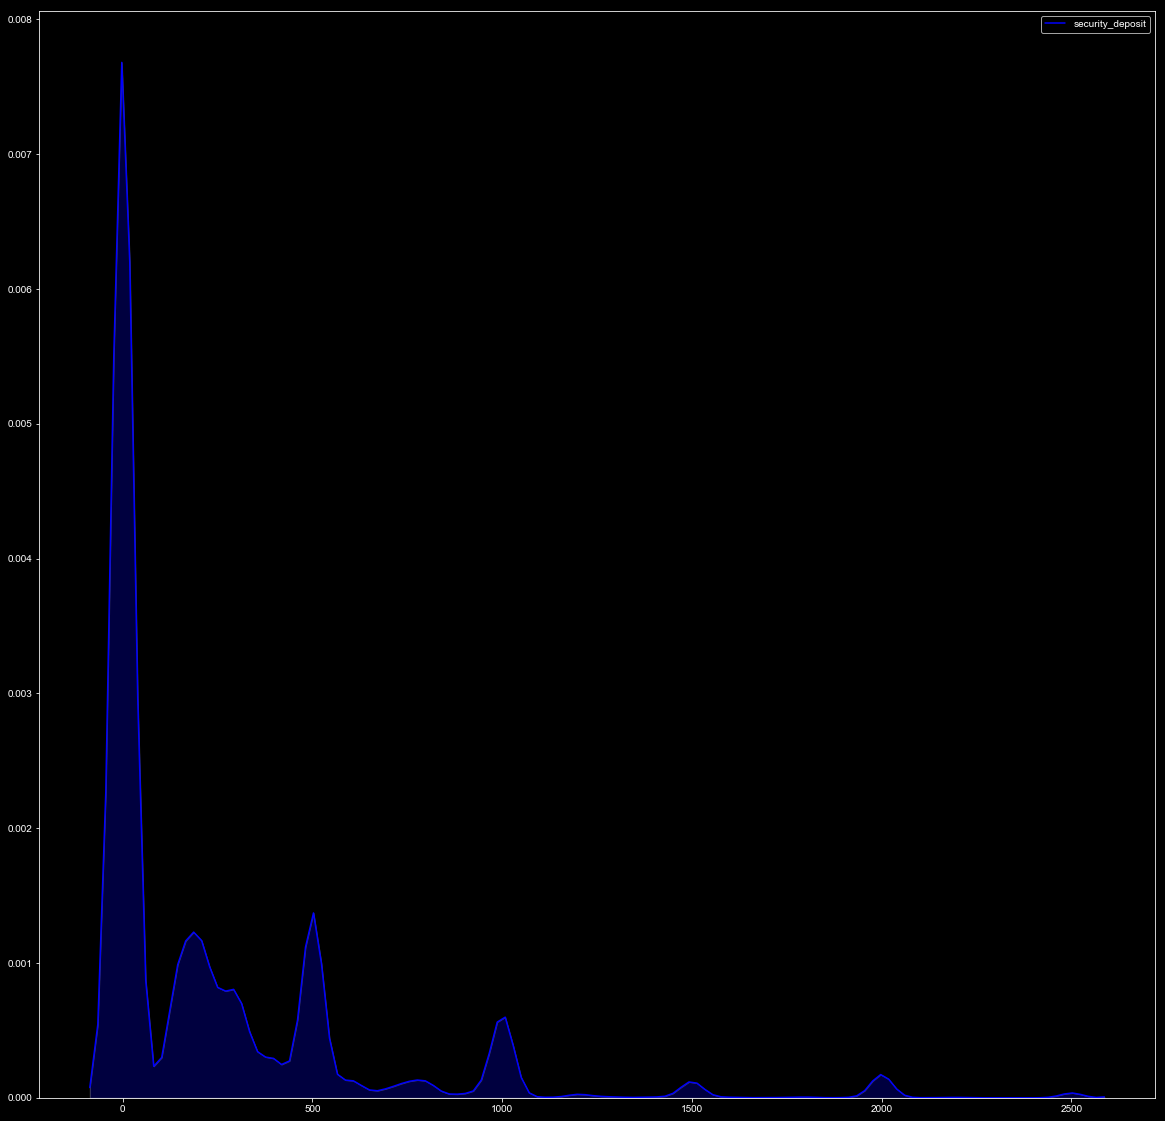

In [72]:
plt.style.use ("dark_background")
sns.kdeplot(airbnb_cleaned_data.security_deposit, shade=True, color="b")

# Interpretation:
​
----
​
Majority of the hotels in airbnb do not ask for security deposit.

# Reading __`🇦🇺 Census Data`__ .

### This dataset has data related to the individual wages , tax, business expenses, etc

In [52]:
census_complete_data= pd.read_csv("Dataset/CensusData.csv")
print("The complete dataset of airbnb has shape :" ,census_complete_data.shape)
census_complete_data.head()

The complete dataset of airbnb has shape : (2472, 34)


Postcode  Number of individuals lodging an income tax return  \
0       800                                               5469    
1       810                                              21199    
2       812                                              11330    
3       820                                              12940    
4       822                                               5981    

   Count taxable income or loss  Average taxable income or loss  \
0                          5469                           75120   
1                         21199                           64240   
2                         11330                           62800   
3                         12940                           78787   
4                          5981                           46457   

   Median taxable income or loss  Proportion with salary or wages  \
0                          54381                            0.930   
1                          54207                            0.870   
2                          55061                            0.880   
3                          61759                            0.890   
4                          34654                            0.930   

   Count salary or wages  Average salary or wages  Median salary or wages  \
0                   5109                    76663                   57618   
1                  18481                    66038                   58351   
2                   9967                    65689                   59653   
3                  11482                    75917                   64902   
4                   5549                    44601                   33787   

   Proportion with net rent                     ...                      \
0                     0.150                     ...                       
1                     0.200                     ...                       
2                     0.200                     ...                       
3                     0.240                     ...                       
4                     0.110                     ...                       

   Count total business expenses  Average total business expenses  \
0                            214                            53482   
1                           1667                            66482   
2                            766                            54295   
3                            898                            53516   
4                            222                            59281   

   Median total business expenses  Proportion with net tax  Count net tax  \
0                           11214                    0.840           4609   
1                           13476                    0.810          17167   
2                           15664                    0.830           9350   
3                           13038                    0.850          10994   
4                           20346                    0.670           3985   

   Average net tax  Median net tax  Count total super member accounts balance  \
0            23516           12699                                       7321   
1            18229           12929                                      24913   
2            16847           12805                                      13588   
3            24297           14956                                      15704   
4            12326            7308                                       9155   

   Average total super member accounts balance  \
0                                        71340   
1                                       111650   
2                                       116002   
3                                       134488   
4                                        44426   

   Median total super member accounts balance  
0                                       12484  
1                                       39517  
2                                       47640  
3         

In [53]:
census_cleaned_data=census_complete_data[["Postcode","Average salary or wages","Average total income or loss","Average total deductions","Average total business income","Average total business expenses","Average net tax","Average total super member accounts balance"
]]
print("Shape of census data after dropping columns is :",census_cleaned_data.shape)

Shape of census data after dropping columns is : (2472, 8)


# Interpretation

----

We are keeping only 8 columns out of 34 columns from the Census data.

In [54]:
census_cleaned_data=census_cleaned_data.rename(columns={'Postcode': 'zipcode'})

# Interpretation

----

We are renaming column __`Postcode`__ of the dataset to __`zipcode`__ for the join with the airbnb dataset.

In [55]:
census_cleaned_data.describe()

zipcode  Average salary or wages  Average total income or loss  \
count 2472.000                 2472.000                      2472.000   
mean  4094.411                54303.484                     57724.970   
std   1496.668                12632.332                     17438.849   
min    800.000                18218.000                     20911.000   
25%   2839.750                45735.500                     47671.750   
50%   3869.500                51924.500                     53907.500   
75%   5165.250                60250.000                     62604.500   
max   7470.000               141262.000                    239276.000   

       Average total deductions  Average total business income  \
count                  2472.000                       2472.000   
mean                   2687.445                      91673.022   
std                    1472.149                      52207.274   
min                     322.000                       6564.000   
25%                    2071.750                      63631.500   
50%                    2398.500                      80157.500   
75%                    2866.250                     103067.250   
max                   39986.000                     893035.000   

       Average total business expenses  Average net tax  \
count                         2472.000         2472.000   
mean                         71500.463        16437.458   
std                          49228.521         8387.214   
min                           3467.000         5955.000   
25%                          45632.000        11866.500   
50%                          60708.000        14205.000   
75%                          82337.250        18098.500   
max                         872746.000       130086.000   

       Average total super member accounts balance  
count                                     2472.000  
mean                                    132193.676  
std                                      68249.844  
min                                      20205.000  
25%                                      97269.250  
50%                                     119512.500  
75%                                     149223.750  
max                                    1488929.000

# Interpretation

----

We are printing the count, mean, std min, max etc. for the dataframe __`census_cleaned_data`__ by using the decribe() function.

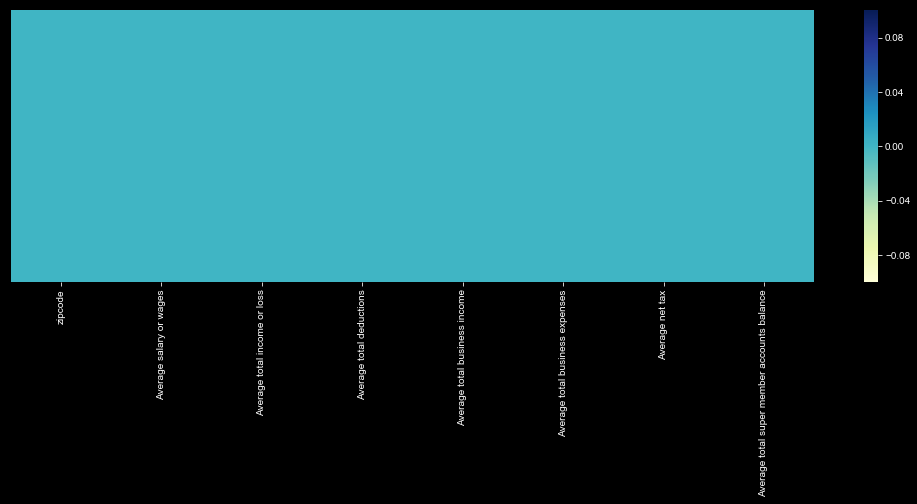

In [56]:
plt.style.use ("dark_background")
plt.subplots(figsize=(18,5))
sns.heatmap(census_cleaned_data.isnull(),yticklabels=False,cbar=True,
            cmap='YlGnBu')

# Interpretation

----

From the above heatmap, we can conclude that there are no null values in the dataframe __`census_cleaned_Data`__

In [57]:
air_cen_join=airbnb_cleaned_data.merge(census_cleaned_data,how='inner')
print("Shape of the dataframe after joining Airbnb & Census datasets is:",air_cen_join.shape)
air_cen_join.head()

Shape of the dataframe after joining Airbnb & Census datasets is: (20531, 57)


name  \
0          Stunning House + pool + beach near Manly.   
1  Beach house + secret garden. True retreat. 3 b...   
2                         Cosy Room, friendly hosts!   
3                                Manly Beach Cottage   
4  Renovated immaculate 1bed apartment 5’ Manly B...   

                                         description experiences_offered  \
0  Beautiful five bedroom family home + pool near...                none   
1  Lovely secluded 2 storey house. Feel like your...                none   
2  Really nice house close to the beach, shops an...                none   
3  A fabulous little beach cottage which is light...                none   
4  The apartment is independent, immaculate, brig...                none   

                                             transit   host_id host_name  \
0  Regular buses from Seaforth to the city (20 mi...  20916102     Sarah   
1  Public transport a no brainier, ferries, jet-c...  49432550     Jenny   
2                                                NaN  36782575   Natalia   
3  Free Manly Council 'Hop, Skip & Jump' bus serv...  27388144     Chris   
4  To move around in Manly Vale is easy and pract...  44410301     Norma   

                                host_location host_response_rate  \
0        Clontarf, New South Wales, Australia                  0   
1           Manly, New South Wales, Australia                  0   
2  Montevideo, Montevideo Department, Uruguay                100   
3                                          FJ                  0   
4                                          AU                100   

  host_is_superhost  host_listings_count  \
0                 0                1.000   
1                 0                1.000   
2                 0                2.000   
3                 0                1.000   
4                 0                1.000   

                      ...                      reviews_per_month  \
0                     ...                                  0.110   
1                     ...                                  0.140   
2                     ...                                  1.280   
3                     ...                                  0.000   
4                     ...                                  0.820   

                                         house_rules amenities_count  \
0  - Limit noise after 10pm - this is a quiet res...              20   
1             Please leave the house as you find it.              41   
2                                                NaN               9   
3                                                NaN              20   
4  The apartment is designed for bed and breakfas...              29   

  Average salary or wages Average total income or loss  \
0                   94175                       105186   
1                   94175                       105186   
2                   94175                       105186   
3                   94175                       105186   
4                   94175                       105186   

  Average total deductions Average total business income  \
0                     3747                        103340   
1                     3747                        103340   
2                     3747                        103340   
3                     3747                        103340   
4                     3747                        103340   

  Average total business expenses Average net tax  \
0                           70117           40778   
1                           70117           40778   
2                           70117           40778   
3                           70117           40778   
4                           70117           40778   

  Average total super member accounts balance  
0                                      220717  
1                                      220717  
2                                      220717  
3                                      220717  
4           

# Interpretation

----

We are joining the __`Airbnb dataset`__ & __`Census dataset`__ to perfom further analysis.We perform an inner join between the two datasets and output has __`35351`__ rows and __`58 columns`__ ( with __`id`__ column as index).